## WARNING:
For Personal Exploration Purposes only. Please look at Lab1_Explanatory_Data_Analysis.ipynb instead.

In [46]:
import pandas as pd
import numpy as np
from IPython.display import display

# Loading Data and Documentation

### Load Data

In [47]:
# Load the data into a DataFrame
data_file_path = "../data/TBI PUD 10-08-2013.csv"

df_data = pd.read_csv(data_file_path)
df_original = df_data
df_data

,PatNum,EmplType,Certification,InjuryMech,High_impact_InjSev,Amnesia_verb,LOCSeparate,LocLen,Seiz,SeizOccur,...,Finding20,Finding21,Finding22,Finding23,DeathTBI,HospHead,HospHeadPosCT,Intub24Head,Neurosurgery,PosIntFinal
0,1,3.0,3,11.0,2.0,0.0,0.0,92.0,0.0,92.0,...,92,92,92,92,0.0,0.0,0,0.0,0.0,0.0
1,2,5.0,3,8.0,2.0,0.0,0.0,92.0,0.0,92.0,...,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0
2,3,5.0,3,5.0,2.0,NaN,NaN,92.0,NaN,92.0,...,0,0,0,0,0.0,1.0,0,0.0,0.0,0.0
3,4,5.0,3,6.0,1.0,91.0,0.0,92.0,0.0,92.0,...,92,92,92,92,0.0,0.0,0,0.0,0.0,0.0
4,5,3.0,3,12.0,2.0,91.0,0.0,92.0,0.0,92.0,...,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43394,43395,5.0,3,8.0,2.0,0.0,0.0,92.0,0.0,92.0,...,92,92,92,92,0.0,0.0,0,0.0,0.0,0.0
43395,43396,5.0,3,6.0,1.0,91.0,0.0,92.0,0.0,92.0,...,92,92,92,92,0.0,0.0,0,0.0,0.0,0.0
43396,43397,5.0,3,7.0,1.0,0.0,0.0,92.0,0.0,92.0,...,92,92,92,92,0.0,0.0,0,0.0,0.0,0.0
43397,43398,5.0,1,8.0,2.0,0.0,0.0,92.0,0.0,92.0,...,92,92,92,92,0.0,0.0,0,0.0,0.0,0.0


### Load Documentation

In [48]:
# Load Documentation

documentation_file_path = "../data/TBI PUD Documentation 10-08-2013.xlsx"

df_doc = pd.read_excel(documentation_file_path)[9:]



# Set the first row as column headers
df_doc.columns = df_doc.iloc[0]  # Assign the first row as column names
df_doc = df_doc[1:].reset_index(drop=True)  # Remove the first row and reset index

df_doc

9,Variable Name,Label/Description,Format Name and Values,Notes,NaN,NaN
0,PatNum,Patient Number,Numeric,A randomly generated number that uniquely iden...,x,NaN
1,EmplType,Position of physician completing data sheet,EmplType\n1 Nurse Practitioner\n2 Physic...,An attending or fellow physician reviewed all ...,x,NaN
2,Certification,Certification of physician completing the form,CertType\n1 Emergency Medicine\n2 Pediatri...,NaN,x,NaN
3,InjuryMech,Injury mechanism,InjMech\n1 Occupant in motor vehicle \n ...,NaN,NaN,NaN
4,High_impact_InjSev,Severity of injury mechanism,InjSev\n1 Low\n2 Moderate\n3 High,Injury Severity based on the injury mechanism ...,NaN,NaN
...,...,...,...,...,...,...
120,HospHead,Hospitalized for 2 or more nights due to head ...,YesNo\n0 No\n1 Yes,NaN,x,NaN
121,HospHeadPosCT,Hospitalized for 2 or more nights due to head ...,YesNo\n0 No\n1 Yes,The hospitalization had to be due to the traum...,RES,NaN
122,Intub24Head,Intubated greater than 24 hours for head trauma,YesNo\n0 No\n1 Yes,NaN,RES,NaN
123,Neurosurgery,Neurosurgery,YesNo\n0 No\n1 Yes,NaN,RES,NaN


# Let us inspect and clean each data item of interest individually

In [49]:
def get_variable_info(variable_name, df_data, df_doc=None):
    """
    Given a variable name (column title from df_data), this function returns:
    - The full column from df_data as a DataFrame.
    - The corresponding row from df_doc where 'Variable Name' matches, also as a DataFrame.

    Parameters:
        variable_name (str): The name of the variable (column title from df_data).
        df_data (pd.DataFrame): The main dataset.
        df_doc (pd.DataFrame): The documentation dataset. If None, will just return column.

    Displays:
    - Data column for format and variable
    - Data information and notes

    Returns:
    - The full column from df_data
    """
    if variable_name not in df_data.columns:
        raise ValueError(f"'{variable_name}' not found in df_data columns.")

    # Extract the full column and format it as a DataFrame
    column_data = pd.DataFrame(df_data[variable_name])

    # Find the corresponding row in df_doc
    if(df_doc is not None):
        doc_row = df_doc[df_doc["Variable Name"] == variable_name]

    # Display both DataFrames
    print(f"\nData Column for '{variable_name}':")
    display(column_data)

    print(f"\nDocumentation Row for '{variable_name}':")
    
    if(df_doc is not None):
        display(doc_row)

    if(df_doc is not None):

        # Extract the 'Notes' column if it exists
        notes_value = doc_row["Notes"].values[0] if "Notes" in df_doc.columns and not doc_row.empty else None

        # Extract the 'Label/Description' column if it exists
        desc_value = doc_row["Label/Description"].values[0] if "Label/Description" in df_doc.columns and not doc_row.empty else None

        # Extract the 'Format Name and Values' column if it exists
        format_value = doc_row["Format Name and Values"].values[0] if "Format Name and Values" in df_doc.columns and not doc_row.empty else None

        print("\nReturned Notes:")
        print(notes_value)


        print("\nReturned Label/Description:")
        print(desc_value)

        print("\nReturned Format Name and Values:")
        print(format_value)

    return df_data[variable_name]

In [50]:
def get_frequency_table(data_column):
    """
    Given a Pandas Series (data column), this function returns a frequency table, 
    including NaN values.

    Parameters:
        data_column (pd.Series): A column from a DataFrame.

    Returns:
        pd.DataFrame: A frequency table with unique values and their counts.
    """
    if not isinstance(data_column, pd.Series):
        raise TypeError("Input must be a Pandas Series (a single column from a DataFrame).")

    # Compute frequency table including NaN values
    freq_table = data_column.value_counts(dropna=False).reset_index()
    freq_table.columns = ["Value", "Frequency"]  # Rename columns

    return freq_table


In [51]:
def list_column_data_types(df):
    """
    Lists the unique data types present in each column of a DataFrame.
    
    Args:
        df (pd.DataFrame): The input DataFrame.
    
    Returns:
        pd.DataFrame: A DataFrame with columns ['Column', 'Data_Types'].
    """
    column_types = []
    
    for column in df.columns:
        unique_types = set(df[column].apply(lambda x: type(x).__name__ if pd.notna(x) else 'NaN'))
        column_types.append({'Column': column, 'Data_Types': ', '.join(unique_types)})
    
    return pd.DataFrame(column_types)

# Testing Functions and Exploring Data Types

Here we are just testing some of our useful functions to help in EDA and to create a list of datatypes. The datatypes provided are a little non-descriptive. "Numeric" could mean int or float, for example.

In [52]:
column_data_types_df = list_column_data_types(df_data)

# Store default settings before making changes
default_max_rows = pd.get_option('display.max_rows')
default_max_columns = pd.get_option('display.max_columns')
default_max_colwidth = pd.get_option('display.max_colwidth')

# Set display options to show all rows, columns, and full column width
pd.set_option('display.max_rows', None)      # Show all rows
pd.set_option('display.max_columns', None)   # Show all columns
pd.set_option('display.max_colwidth', None)  # Show full column contents

# Display the DataFrame
display(column_data_types_df)

# Reset settings back to their original values
pd.set_option('display.max_rows', default_max_rows)
pd.set_option('display.max_columns', default_max_columns)
pd.set_option('display.max_colwidth', default_max_colwidth)

,Column,Data_Types
0,PatNum,int
1,EmplType,"NaN, float"
2,Certification,int
3,InjuryMech,"NaN, float"
4,High_impact_InjSev,"NaN, float"
5,Amnesia_verb,"NaN, float"
6,LOCSeparate,"NaN, float"
7,LocLen,"NaN, float"
8,Seiz,"NaN, float"
9,SeizOccur,"NaN, float"


Pandas seems to turn ints to floats if there are NaN values. This should not be an issue, but something to keep note of.

### PatNum

In [53]:
variable_name = "PatNum" 
column_data = get_variable_info(variable_name, df_data, df_doc)


Data Column for 'PatNum':


,PatNum
0,1
1,2
2,3
3,4
4,5
...,...
43394,43395
43395,43396
43396,43397
43397,43398



Documentation Row for 'PatNum':


9,Variable Name,Label/Description,Format Name and Values,Notes,NaN,NaN
0,PatNum,Patient Number,Numeric,A randomly generated number that uniquely iden...,x,NaN



Returned Notes:
A randomly generated number that uniquely identifies each patient.

Returned Label/Description:
Patient Number

Returned Format Name and Values:
Numeric


**PatNum** is just a way to randomly mix patients and a way to index them. There is not much to inspect.

### EmplType

In [54]:
variable_name = "EmplType" 
column_data = get_variable_info(variable_name, df_data, df_doc)


Data Column for 'EmplType':


,EmplType
0,3.0
1,5.0
2,5.0
3,5.0
4,3.0
...,...
43394,5.0
43395,5.0
43396,5.0
43397,5.0



Documentation Row for 'EmplType':


9,Variable Name,Label/Description,Format Name and Values,Notes,NaN,NaN
1,EmplType,Position of physician completing data sheet,EmplType\n1 Nurse Practitioner\n2 Physic...,An attending or fellow physician reviewed all ...,x,NaN



Returned Notes:
An attending or fellow physician reviewed all forms.

Returned Label/Description:
Position of physician completing data sheet

Returned Format Name and Values:
EmplType
1    Nurse Practitioner
2    Physician Assistant
3    Resident
4    Fellow
5    Faculty


In [55]:
get_frequency_table(column_data)

,Value,Frequency
0,5.0,22216
1,3.0,14333
2,4.0,3807
3,1.0,1974
4,2.0,1051
5,NaN,18


### Exploring more features

Obviously, some of the features in this dataset are not going to help us much: a randomly assigned index number should (usually) not be a factor in a clinical decision rule. I picked out some features for us to explore further. Some of them will not be used for our primary analysis, others will be useful for us making perturbations.

I first looked at the variables, organized many of them, and listed which variables I would find most relevant. I then later better narrowed down them down using domain-expert advice.

**Primary Predictors**

1. **InjuryMech** – Mechanism of injury  
2. **High_impact_InjSev** – Severity of injury mechanism  
3. **LOCSeparate** – History of loss of consciousness  
4. **LocLen** – Duration of loss of consciousness  
5. **Seiz** – Post-traumatic seizure  
6. **SeizOccur** – When the seizure occurred  

**Additional Useful Variables**

7. **SeizLen** – Duration of the seizure  
8. **ActNorm** – Whether the patient is acting normally post-injury  
9. **Vomit** – Whether the patient has vomited  
10. **VomitNbr** – Number of vomiting episodes  
11. **VomitStart** – When vomiting began  
12. **VomitLast** – Last recorded vomiting episode  

 **Glasgow Coma Scale (GCS)**

13. **GCSEye** – Eye response  
14. **GCSVerbal** – Verbal response  
15. **GCSMotor** – Motor response  
16. **GCSTotal** – Total GCS score  
17. **GCSGroup** – Grouped GCS categories  

 **Neurological Deficits**

18. **HemaLoc** – Presence of hematoma  
19. **NeuroD** – General neurological deficit indicator  
20. **NeuroDMotor** – Motor neurological deficit  
21. **NeuroDSensory** – Sensory neurological deficit  
22. **NeuroDCranial** – Cranial nerve deficits  
23. **NeuroDReflex** – Reflex abnormalities  
24. **NeuroDOth** – Other neurological deficits  

 **CT Scan Information**

25. **CTForm1** – Type of CT scan performed  
26. **CTDone** – Whether a CT scan was performed  
27. **EDCT** – Whether CT was done in the emergency department  
28. **PosCT** – Whether the CT scan was positive for abnormal findings  
29. **HospHeadPosCT** – Hospitalization decision based on positive CT findings  
30. **Neurosurgery** – Whether neurosurgical intervention was required  

 **Age-Related Features**

31. **IndAge** – Indicator variable for age classification  
32. **AgeInMonth** – Age in months (for pediatric patients)  
33. **AgeinYears** – Age in years  
34. **AgeTwoPlus** – Whether the patient is two years or older  

 **Other Important Indicators**

35. **IndLOC** – Indicator for loss of consciousness  
36. **IndNeuroD** – Indicator for neurological deficits  
37. **IndSeiz** – Indicator for seizure occurrence  
38. **IndVomit** – Indicator for vomiting episodes  

 **CT Sedation Information**

39. **CTSed** – Whether sedation was required for CT scan  
40. **CTSedAgitate** – Agitation level during CT sedation  
41. **CTSedAge** – Age-related sedation information  
42. **CTSedRqst** – Whether sedation was requested  
43. **CTSedOth** – Other CT sedation-related details  

We can narrow down our list using domain-experts: which we do in the next section.



### Variables Registered Nurse Cathy recommended to look out for diagnosing TBI:
1. **Confusion**  
2. **Headache**  
3. **Pupil Abnormalities**  
4. **Nausea**  
5. **Seizures**  
6. **Vomiting**  
7. **Abnormal Posturing**
8. **systolic hypertension, irregular breathing, or bradycardia** (Cushing's triad)

Source: https://www.youtube.com/watch?v=e7Yl6urL7n0&ab_channel=LevelUpRN


##### Variables Found in the Dataset:

**Seizures:**
- **Seiz** – Presence of a seizure  
- **SeizOccur** – When the seizure occurred  
- **SeizLen** – Duration of the seizure  
- **IndSeiz** – Indicator variable for seizure occurrence  

**Vomiting & Nausea:**
- **Vomit** – Whether the patient has vomited  
- **VomitNbr** – Number of vomiting episodes  
- **VomitStart** – When vomiting began  
- **VomitLast** – Last recorded vomiting episode  
- **IndVomit** – Indicator variable for vomiting occurrence  

**Pupil Abnormalities & Posturing:**
- **GCSEye** – Eye response in the Glasgow Coma Scale (may include pupil reaction abnormalities)  


##### Variables Not Found in the Dataset:
- Confusion
- Headache
- Abnormal Posturing (Decorticate/Decerebrate posturing)
- Cushing's triad

There are no explicit variables for confusion, headache, or abnormal posturing. If needed, we may explore text descriptions, GCS motor scores, or indirect neurological indicators to infer these conditions, but that comes with its own trade offs.


### Critically thinking about variables for supervision

We want to see if we can create a label feature for our data or if we will favor an unsupervised analysis. We picked out contenders and ranked them in buckets.



**Seizures:**

**Vomiting & Nausea:**
- **VomitLast** – Last recorded vomiting episode  

**Pupil Abnormalities & Posturing:**

##### **High confidence and why:**

- **IndVomit** – Indicator variable for vomiting occurrence  

There could be a lot of false non-positives because if a person did not get a procedure done, they will be marked as not having had vomited which is misleading. But we could still use this to indicate people we are extra sure have had a seizure.


- **IndSeiz** – Indicator variable for seizure occurrence  

There could be a lot of false non-positives because if a person did not get a procedure done, they will be marked as not having had a seizure which is misleading. But we could still use this to indicate people we are extra sure have had a seizure.

- **Seiz** – Presence of a post-trauma seizure

Domain expert said that this is one of the symptoms to look out for. **Cleaning** Note that there are Nan values. We can either keep them as unknown, or we could try to predict them using other seizure features. Note also that post-trauma may or may not imply that it is from the trauma or not.

- **SeizOccur** – When the seizure occurred

Domain expert said that this is one of the symptoms to look out for. **Cleaning** Note that there are Nan values. Note that "not applicable" could also mean missing values.

- **SeizLen** – Duration of the seizure  

Domain expert said that this is one of the symptoms to look out for. **Cleaning** Note that there are Nan values. Note that "not applicable" could also mean missing values.

- **VomitNbr** – Number of vomiting episodes after incident

Domain expert said that this is one of the symptoms to look out for. **Cleaning** Note that there are Nan values. Note that "not applicable" could also mean missing values.

- **VomitStart** – When vomiting began

Domain expert said that this is one of the symptoms to look out for. **Cleaning** Note that there are Nan values. Note that "not applicable" could also mean missing values.

- **GCSEye** – Eye response in the Glasgow Coma Scale (may include pupil reaction abnormalities)  

Domain expert said that this is one of the symptoms to look out for. **Cleaning** Note that there are Nan values.


##### **Medium confidence and why:**

- **Vomit** – Whether the patient has vomited after the incident

Seems not too useful since there could be many reasons why people would vomit. but could be useful for people who did not vomit after: converse I do not think is true. Number of vomits may be better.

- **InjuryMech** – Mechanism of injury  

Note  the frequency table we built, it seems that some of the data is labeled "other." Moreover, you can be hit by a car at 1mph and hit by a baseball bat at 20mph so may not be the best indicator for severity. **Cleaning** Note that there are Nan values we can list as "other."


##### **Lower-contenders and why:**
- **Neurosurgery** – Whether neurosurgical intervention was required 

Did not have any notes. Thus, it is hard for us to tell why they had Neurosurgery and/or if the brain-hit event happened before or after the surgery.

- **High_impact_InjSev** – Severity of injury mechanism  

Seems like could just be a constructed feature from InjuryMech, meaning we may not get more insight out of this. Also this ranks being hit by a plane as "Medium" severity which seems like a bad method for ranking. Probably had a lot of multicollinearity with InjuryMech. Also, TBI does not always come from high impact events.

- **ActNorm** – Whether the patient is acting normally post-injury

Low contender because there are many reasons why people may act different after a health event. You could act differently from a broken arm or maybe just realizing life is short. There are no notes on this feature so I would have trouble justifying using it. 



In [56]:
# Exploring Various variables

variable_name = "SeizOccur"
column_data = get_variable_info(variable_name, df_data, df_doc)
get_frequency_table(column_data)


Data Column for 'SeizOccur':


,SeizOccur
0,92.0
1,92.0
2,92.0
3,92.0
4,92.0
...,...
43394,92.0
43395,92.0
43396,92.0
43397,92.0



Documentation Row for 'SeizOccur':


9,Variable Name,Label/Description,Format Name and Values,Notes,NaN,NaN
9,SeizOccur,When did the post-traumatic seizure occur?,SeizOcc\n1 Immediately on contact\n2 Withi...,Not applicable is marked if post-traumatic sei...,NaN,NaN



Returned Notes:
Not applicable is marked if post-traumatic seizure is answered as no or missing.

Returned Label/Description:
When did the post-traumatic seizure occur?

Returned Format Name and Values:
SeizOcc
1   Immediately on contact
2   Within 30 minutes of injury
3   > 30 minutes after injury
92 Not applicable


,Value,Frequency
0,92.0,42796
1,1.0,253
2,2.0,210
3,NaN,71
4,3.0,69


# Feature Construction

### Seizures

Let us create an index for seizures, keeping in mind the context of the variables:

- **IndSeiz** – Indicator variable for seizure occurrence  

There could be a lot of false non-positives because if a person did not get a procedure done, they will be marked as not having had a seizure which is misleading. But we could still use this to indicate people we are extra sure have had a seizure.

- **Seiz** – Presence of a post-trauma seizure

Domain expert said that this is one of the symptoms to look out for. **Cleaning** Note that there are Nan values. We can either keep them as unknown, or we could try to predict them using other seizure features. Note also that post-trauma may or may not imply that it is from the trauma or not.

- **SeizOccur** – When the seizure occurred

Domain expert said that this is one of the symptoms to look out for. **Cleaning** Note that there are Nan values. Note that "not applicable" could also mean missing values.

- **SeizLen** – Duration of the seizure  

Domain expert said that this is one of the symptoms to look out for. **Cleaning** Note that there are Nan values. Note that "not applicable" could also mean missing values.


### Seizure Feature Construction Critical Thinking

Let us create our own indicator function for if a patient has every had a seizure because the old one only applies for people who had a procedure done. We can use the features provided to deduce if people have ever had a seizure and if they had one after the incident or not.

In [57]:
# Select only the five specified columns for seiz table
selected_columns = ["PatNum", "IndSeiz", "Seiz", "SeizOccur", "SeizLen"]
df_seiz = df_data[selected_columns]

# Display the new DataFrame
df_seiz

,PatNum,IndSeiz,Seiz,SeizOccur,SeizLen
0,1,92,0.0,92.0,92.0
1,2,0,0.0,92.0,92.0
2,3,0,NaN,92.0,92.0
3,4,92,0.0,92.0,92.0
4,5,0,0.0,92.0,92.0
...,...,...,...,...,...
43394,43395,92,0.0,92.0,92.0
43395,43396,92,0.0,92.0,92.0
43396,43397,92,0.0,92.0,92.0
43397,43398,92,0.0,92.0,92.0


In [58]:
# Initialize HadSeiz and HadSeizAfterEvent with NaN
df_data["HadSeiz"] = np.nan
df_data["HadSeizAfterEvent"] = np.nan

# Function to update HadSeiz and HadSeizAfterEvent based on conditions
def update_had_seiz(row):
    """
    Updates HadSeiz and HadSeizAfterEvent based on IndSeiz, Seiz, SeizOccur, and SeizLen.
    """

    # --- CHECK 1: IndSeiz ---
    if pd.isna(row["HadSeiz"]):  
        if row["IndSeiz"] == 0:
            row["HadSeiz"] = 0
        elif row["IndSeiz"] == 1:
            row["HadSeiz"] = 1
    elif row["HadSeiz"] == 0 and row["IndSeiz"] == 1:
        row["HadSeiz"] = "contradiction"

    # --- CHECK 2: Seiz ---
    if pd.isna(row["HadSeiz"]):
        if row["Seiz"] == 0:
            row["HadSeiz"] = 0
        elif row["Seiz"] == 1:
            row["HadSeiz"] = 1
    elif row["HadSeiz"] == 0 and row["Seiz"] == 1:
        row["HadSeiz"] = "contradiction"

    # --- CHECK 3: SeizOccur ---
    if pd.isna(row["HadSeiz"]):
        if row["SeizOccur"] in [1, 2, 3]:
            row["HadSeiz"] = 1
    elif row["HadSeiz"] == 0 and row["SeizOccur"] in [1, 2, 3]:
        row["HadSeiz"] = "contradiction"

    # --- CHECK 4: SeizLen ---
    if pd.isna(row["HadSeiz"]):
        if row["SeizLen"] in [1, 2, 3, 4]:
            row["HadSeiz"] = 1
    elif row["HadSeiz"] == 0 and row["SeizLen"] in [1, 2, 3, 4]:
        row["HadSeiz"] = "contradiction"

    # --- APPLY SAME LOGIC TO HadSeizAfterEvent ---
    if pd.isna(row["HadSeizAfterEvent"]):
        if row["IndSeiz"] == 0:
            row["HadSeizAfterEvent"] = 0
        elif row["IndSeiz"] == 1:
            row["HadSeizAfterEvent"] = 1
    elif row["HadSeizAfterEvent"] == 0 and row["IndSeiz"] == 1:
        row["HadSeizAfterEvent"] = "contradiction"

    if pd.isna(row["HadSeizAfterEvent"]):
        if row["Seiz"] == 0:
            row["HadSeizAfterEvent"] = 0
        elif row["Seiz"] == 1:
            row["HadSeizAfterEvent"] = 1
    elif row["HadSeizAfterEvent"] == 0 and row["Seiz"] == 1:
        row["HadSeizAfterEvent"] = "contradiction"

    if pd.isna(row["HadSeizAfterEvent"]):
        if row["SeizOccur"] in [1, 2, 3]:
            row["HadSeizAfterEvent"] = 1
    elif row["HadSeizAfterEvent"] == 0 and row["SeizOccur"] in [1, 2, 3]:
        row["HadSeizAfterEvent"] = "contradiction"

    if pd.isna(row["HadSeizAfterEvent"]):
        if row["SeizLen"] in [1, 2, 3, 4]:
            row["HadSeizAfterEvent"] = 1
    elif row["HadSeizAfterEvent"] == 0 and row["SeizLen"] in [1, 2, 3, 4]:
        row["HadSeizAfterEvent"] = "contradiction"

    return row  # Return the modified row

# Apply the function to update df_data
df_data = df_data.apply(update_had_seiz, axis=1)

df_filtered = df_data[df_data["HadSeiz"] == 1]
df_filtered


/tmp/ipykernel_47936/2377113340.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'contradiction' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  row["HadSeiz"] = "contradiction"


,PatNum,EmplType,Certification,InjuryMech,High_impact_InjSev,Amnesia_verb,LOCSeparate,LocLen,Seiz,SeizOccur,...,Finding22,Finding23,DeathTBI,HospHead,HospHeadPosCT,Intub24Head,Neurosurgery,PosIntFinal,HadSeiz,HadSeizAfterEvent
19,20.0,5.0,2.0,6.0,1.0,0.0,0.0,92.0,0.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
75,76.0,5.0,3.0,8.0,3.0,NaN,1.0,4.0,1.0,NaN,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,1.0,1.0
110,111.0,5.0,3.0,6.0,1.0,91.0,0.0,92.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
228,229.0,5.0,3.0,10.0,2.0,0.0,1.0,NaN,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
244,245.0,5.0,3.0,5.0,2.0,1.0,1.0,3.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42891,42892.0,5.0,3.0,8.0,2.0,0.0,0.0,92.0,1.0,3.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
43006,43007.0,5.0,3.0,4.0,2.0,1.0,1.0,3.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
43098,43099.0,5.0,3.0,8.0,2.0,91.0,1.0,4.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
43173,43174.0,5.0,1.0,6.0,1.0,0.0,0.0,92.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [59]:
variable_name = "IndSeiz"
column_data = get_variable_info(variable_name, df_seiz)
get_frequency_table(column_data)


Data Column for 'IndSeiz':


,IndSeiz
0,92
1,0
2,0
3,92
4,0
...,...
43394,92
43395,92
43396,92
43397,92



Documentation Row for 'IndSeiz':


,Value,Frequency
0,92,26474
1,0,16423
2,1,502


(vestage)

Clearly you can see that HadSeizAfterEvent and HadSeiz end up being the same so we can drop HadSeizAfterEvent and keep HadSeiz. Also, we can see that compared to just using SeizInd, we caught a lot more peopple who had seizures with our new feature. With just SeizInd, there would have been 26,000 people we would not have accounted for (outdataed), while using HadSeiz, we now can only not account for around 300 people. Moreover, we caught around 86 people in which there were contradictions in their medical records.

In [60]:
# Filter the DataFrame to return rows where HadSeiz is labeled as "contradiction"
df_contradictions = df_data[df_data["HadSeiz"] == "contradiction"]
df_contradictions

,PatNum,EmplType,Certification,InjuryMech,High_impact_InjSev,Amnesia_verb,LOCSeparate,LocLen,Seiz,SeizOccur,...,Finding22,Finding23,DeathTBI,HospHead,HospHeadPosCT,Intub24Head,Neurosurgery,PosIntFinal,HadSeiz,HadSeizAfterEvent
670,671.0,4.0,3.0,1.0,2.0,91.0,1.0,NaN,1.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,contradiction,contradiction
754,755.0,5.0,3.0,1.0,3.0,NaN,2.0,NaN,1.0,NaN,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,contradiction,contradiction
2353,2354.0,3.0,3.0,11.0,2.0,1.0,1.0,NaN,1.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,contradiction,contradiction
2362,2363.0,3.0,3.0,6.0,1.0,91.0,NaN,92.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,contradiction,contradiction
2637,2638.0,5.0,3.0,2.0,3.0,0.0,2.0,NaN,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,contradiction,contradiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41259,41260.0,5.0,3.0,1.0,2.0,91.0,1.0,NaN,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,contradiction,contradiction
41696,41697.0,3.0,3.0,6.0,1.0,91.0,0.0,92.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,contradiction,contradiction
41903,41904.0,3.0,2.0,6.0,1.0,1.0,0.0,92.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,contradiction,contradiction
42833,42834.0,4.0,3.0,8.0,2.0,NaN,0.0,92.0,1.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,contradiction,contradiction


Clearly the above rows are contradictions because one can not have a seizure after the event, but also not had a seizure in their life. This contradiction could either be coming from mis-inputs of data or because IndSeiz is recorded at a different time (likely before) Seiz is recorded. But, keeping the rows labeled as contradiction should not be a problem in either case. 

We can now use this new feature to fill in the previous ones: if someone has never had a seizure before, we can count them as having 0 seizure occurances and 0 length.

In [61]:
# Update rows where HadSeiz == 0 to ensure IndSeiz, Seiz, SeizOccur, and SeizLen are also 0
df_data.loc[df_data["HadSeiz"] == 0, ["IndSeiz", "Seiz", "SeizOccur", "SeizLen"]] = 0

# Display the updated DataFrame
df_data

,PatNum,EmplType,Certification,InjuryMech,High_impact_InjSev,Amnesia_verb,LOCSeparate,LocLen,Seiz,SeizOccur,...,Finding22,Finding23,DeathTBI,HospHead,HospHeadPosCT,Intub24Head,Neurosurgery,PosIntFinal,HadSeiz,HadSeizAfterEvent
0,1.0,3.0,3.0,11.0,2.0,0.0,0.0,92.0,0.0,0.0,...,92.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,5.0,3.0,8.0,2.0,0.0,0.0,92.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,5.0,3.0,5.0,2.0,NaN,NaN,92.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,5.0,3.0,6.0,1.0,91.0,0.0,92.0,0.0,0.0,...,92.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3.0,3.0,12.0,2.0,91.0,0.0,92.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43394,43395.0,5.0,3.0,8.0,2.0,0.0,0.0,92.0,0.0,0.0,...,92.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43395,43396.0,5.0,3.0,6.0,1.0,91.0,0.0,92.0,0.0,0.0,...,92.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43396,43397.0,5.0,3.0,7.0,1.0,0.0,0.0,92.0,0.0,0.0,...,92.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43397,43398.0,5.0,1.0,8.0,2.0,0.0,0.0,92.0,0.0,0.0,...,92.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
variable_name = "SeizOccur"
column_data = get_variable_info(variable_name, df_seiz)
get_frequency_table(column_data)


Data Column for 'SeizOccur':


,SeizOccur
0,92.0
1,92.0
2,92.0
3,92.0
4,92.0
...,...
43394,92.0
43395,92.0
43396,92.0
43397,92.0



Documentation Row for 'SeizOccur':


,Value,Frequency
0,92.0,42796
1,1.0,253
2,2.0,210
3,NaN,71
4,3.0,69


You can see that for SeizOccur, we have been able to account for around 42000 people who we could not account for before. Similar is true for the other features.

In [63]:
# Replace NaN or 92 with "unknown" in specified columns
df_seiz[["IndSeiz", "Seiz", "SeizOccur", "SeizLen"]] = df_seiz[["IndSeiz", "Seiz", "SeizOccur", "SeizLen"]].applymap(
    lambda x: float('nan') if pd.isna(x) or x == 92 else x
)

df_seiz


/tmp/ipykernel_47936/803964955.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_seiz[["IndSeiz", "Seiz", "SeizOccur", "SeizLen"]] = df_seiz[["IndSeiz", "Seiz", "SeizOccur", "SeizLen"]].applymap(
/tmp/ipykernel_47936/803964955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seiz[["IndSeiz", "Seiz", "SeizOccur", "SeizLen"]] = df_seiz[["IndSeiz", "Seiz", "SeizOccur", "SeizLen"]].applymap(


,PatNum,IndSeiz,Seiz,SeizOccur,SeizLen
0,1,NaN,0.0,NaN,NaN
1,2,0.0,0.0,NaN,NaN
2,3,0.0,NaN,NaN,NaN
3,4,NaN,0.0,NaN,NaN
4,5,0.0,0.0,NaN,NaN
...,...,...,...,...,...
43394,43395,NaN,0.0,NaN,NaN
43395,43396,NaN,0.0,NaN,NaN
43396,43397,NaN,0.0,NaN,NaN
43397,43398,NaN,0.0,NaN,NaN


In [64]:
variable_name = "SeizOccur"
column_data = get_variable_info(variable_name, df_seiz)
get_frequency_table(column_data)


Data Column for 'SeizOccur':


,SeizOccur
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
43394,NaN
43395,NaN
43396,NaN
43397,NaN



Documentation Row for 'SeizOccur':


,Value,Frequency
0,NaN,42867
1,1.0,253
2,2.0,210
3,3.0,69


For each of these features we simply just took all the unknown data and labeled it as such.

### Vomiting

This feature we are not going to deduce if they have vomited or not. Vomiting is something most people experience in their life, so creating a feature to find out who and who has ever vomited in their life will be less helpful that seizures. Knowing how many vomiting sessions happened and chronic vomiting started is more helpful: data we already have.

However, deducing if they have not vomited is still useful as we can fill in some of the other features like we did we seizures.

In [65]:
# Making sure we remember what our variables are

variable_name = "VomitLast"
column_data = get_variable_info(variable_name, df_data, df_doc)
get_frequency_table(column_data)


Data Column for 'VomitLast':


,VomitLast
0,92.0
1,1.0
2,92.0
3,92.0
4,2.0
...,...
43394,92.0
43395,92.0
43396,92.0
43397,92.0



Documentation Row for 'VomitLast':


9,Variable Name,Label/Description,Format Name and Values,Notes,NaN,NaN
18,VomitLast,When was the last episode of vomiting?,VomLast\n1 < 1 hr before ED evaluation\n2 ...,Not applicable is marked if vomiting (at any t...,NaN,NaN



Returned Notes:
Not applicable is marked if vomiting (at any time after injury) is answered as no or missing.

Returned Label/Description:
When was the last episode of vomiting?

Returned Format Name and Values:
VomLast
1   < 1 hr before ED evaluation
2   1 -4 hrs before ED evaluation
3  > 4 hrs before ED evaluation
92  Not applicable


,Value,Frequency
0,92.0,37595
1,1.0,2762
2,2.0,1712
3,NaN,992
4,3.0,338


In [66]:
# Create df_vomit with selected features
df_vomit = df_data[["PatNum", "VomitNbr", "VomitStart", "IndVomit", "VomitLast"]].copy()
df_vomit

,PatNum,VomitNbr,VomitStart,IndVomit,VomitLast
0,1.0,92.0,92.0,92.0,92.0
1,2.0,3.0,3.0,1.0,1.0
2,3.0,92.0,92.0,0.0,92.0
3,4.0,92.0,92.0,92.0,92.0
4,5.0,1.0,2.0,0.0,2.0
...,...,...,...,...,...
43394,43395.0,92.0,92.0,92.0,92.0
43395,43396.0,92.0,92.0,92.0,92.0
43396,43397.0,92.0,92.0,92.0,92.0
43397,43398.0,92.0,92.0,92.0,92.0


In [67]:

# Initialize the new feature vomitEvidenceCount with 0
df_vomit["vomitEvidenceCount"] = 0
df_vomit["vomitEvidenceCount"] = 0

# Initialize the new feature vLackOfEvidence with 0
df_vomit["vLackOfEvidence"] = 0
df_vomit["vLackOfEvidence"] = 0

# Increase vomitEvidenceCount based on conditions
df_vomit["vomitEvidenceCount"] += df_vomit["VomitNbr"].isin([1, 2, 3]).astype(int)
df_vomit["vomitEvidenceCount"] += df_vomit["VomitStart"].isin([1, 2, 3, 4]).astype(int)
df_vomit["vomitEvidenceCount"] += df_vomit["VomitLast"].isin([1, 2, 3]).astype(int)
df_vomit["vomitEvidenceCount"] += (df_vomit["IndVomit"] == 1).astype(int)

# Increase vLackOfEvidence based on conditions
df_vomit["vLackOfEvidence"] += df_vomit["VomitNbr"].isin([92, float("nan")]).astype(int)
df_vomit["vLackOfEvidence"] += df_vomit["VomitStart"].isin([92, float("nan")]).astype(int)
df_vomit["vLackOfEvidence"] += df_vomit["VomitLast"].isin([92, float("nan")]).astype(int)
df_vomit["vLackOfEvidence"] += (df_vomit["IndVomit"].isin([92, float("nan")])).astype(int)


df_vomit

,PatNum,VomitNbr,VomitStart,IndVomit,VomitLast,vomitEvidenceCount,vLackOfEvidence
0,1.0,92.0,92.0,92.0,92.0,0,4
1,2.0,3.0,3.0,1.0,1.0,4,0
2,3.0,92.0,92.0,0.0,92.0,0,3
3,4.0,92.0,92.0,92.0,92.0,0,4
4,5.0,1.0,2.0,0.0,2.0,3,0
...,...,...,...,...,...,...,...
43394,43395.0,92.0,92.0,92.0,92.0,0,4
43395,43396.0,92.0,92.0,92.0,92.0,0,4
43396,43397.0,92.0,92.0,92.0,92.0,0,4
43397,43398.0,92.0,92.0,92.0,92.0,0,4


In [68]:
# Define the columns to modify
vomit_columns = ["VomitNbr", "VomitStart", "IndVomit", "VomitLast"]

# Replace 92 and NaN with 0 for rows where vomitEvidenceCount is 0 and vLackOfEvidence is not 4
for col in vomit_columns:
    df_vomit.loc[
        (df_vomit["vomitEvidenceCount"] == 0) & (df_vomit["vLackOfEvidence"] != 4), col
    ] = df_vomit[col].replace({92: 0, pd.NA: 0, None: 0, float("nan"): 0})

# Drop vomitEvidenceCount and vLackOfEvidence
df_vomit = df_vomit.drop(columns=["vomitEvidenceCount"]).drop(columns=["vLackOfEvidence"])

df_vomit

,PatNum,VomitNbr,VomitStart,IndVomit,VomitLast
0,1.0,92.0,92.0,92.0,92.0
1,2.0,3.0,3.0,1.0,1.0
2,3.0,0.0,0.0,0.0,0.0
3,4.0,92.0,92.0,92.0,92.0
4,5.0,1.0,2.0,0.0,2.0
...,...,...,...,...,...
43394,43395.0,92.0,92.0,92.0,92.0
43395,43396.0,92.0,92.0,92.0,92.0
43396,43397.0,92.0,92.0,92.0,92.0
43397,43398.0,92.0,92.0,92.0,92.0


In [69]:
# Replace NaN or 92 with float('nan') in specified columns
df_vomit[vomit_columns] = df_vomit[vomit_columns].applymap(
    lambda x: float('nan') if pd.isna(x) or x == 92 else x
)

df_vomit

/tmp/ipykernel_47936/3648450237.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_vomit[vomit_columns] = df_vomit[vomit_columns].applymap(


,PatNum,VomitNbr,VomitStart,IndVomit,VomitLast
0,1.0,NaN,NaN,NaN,NaN
1,2.0,3.0,3.0,1.0,1.0
2,3.0,0.0,0.0,0.0,0.0
3,4.0,NaN,NaN,NaN,NaN
4,5.0,1.0,2.0,0.0,2.0
...,...,...,...,...,...
43394,43395.0,NaN,NaN,NaN,NaN
43395,43396.0,NaN,NaN,NaN,NaN
43396,43397.0,NaN,NaN,NaN,NaN
43397,43398.0,NaN,NaN,NaN,NaN


In [70]:
variable_name = "VomitLast"
column_data = get_variable_info(variable_name, df_vomit)
get_frequency_table(column_data)


Data Column for 'VomitLast':


,VomitLast
0,NaN
1,1.0
2,0.0
3,NaN
4,2.0
...,...
43394,NaN
43395,NaN
43396,NaN
43397,NaN



Documentation Row for 'VomitLast':


,Value,Frequency
0,NaN,25700
1,0.0,12887
2,1.0,2762
3,2.0,1712
4,3.0,338


We now only have 1007 unknowns instead of 20k+.

### Updating df_data

In [71]:
# Replace the respective columns in df_data with the updated versions from df_vomit
df_data[df_vomit.columns] = df_vomit

# Replace the respective columns in df_data with the updated versions from df_seiz
df_data[df_seiz.columns] = df_seiz

df_data

,PatNum,EmplType,Certification,InjuryMech,High_impact_InjSev,Amnesia_verb,LOCSeparate,LocLen,Seiz,SeizOccur,...,Finding22,Finding23,DeathTBI,HospHead,HospHeadPosCT,Intub24Head,Neurosurgery,PosIntFinal,HadSeiz,HadSeizAfterEvent
0,1,3.0,3.0,11.0,2.0,0.0,0.0,92.0,0.0,NaN,...,92.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,5.0,3.0,8.0,2.0,0.0,0.0,92.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,5.0,3.0,5.0,2.0,NaN,NaN,92.0,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,5.0,3.0,6.0,1.0,91.0,0.0,92.0,0.0,NaN,...,92.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,3.0,3.0,12.0,2.0,91.0,0.0,92.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43394,43395,5.0,3.0,8.0,2.0,0.0,0.0,92.0,0.0,NaN,...,92.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43395,43396,5.0,3.0,6.0,1.0,91.0,0.0,92.0,0.0,NaN,...,92.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43396,43397,5.0,3.0,7.0,1.0,0.0,0.0,92.0,0.0,NaN,...,92.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43397,43398,5.0,1.0,8.0,2.0,0.0,0.0,92.0,0.0,NaN,...,92.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Some relationship EDA

We have been doing a lot of cleaning and exploring data, but not a lot of exploring relationships. Lets look at that now.

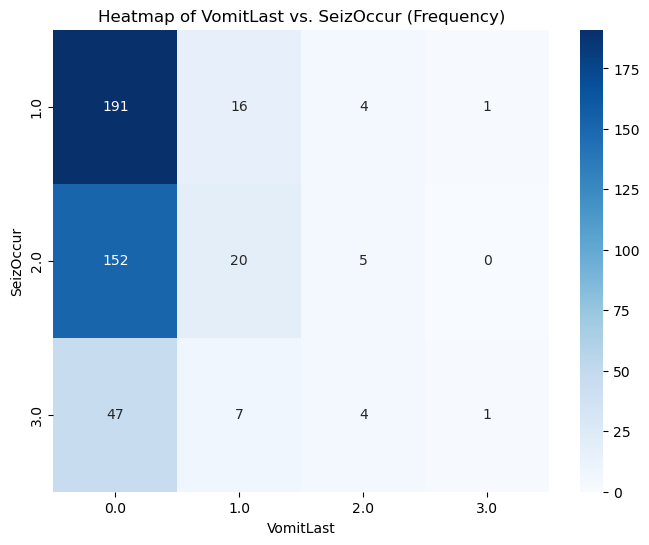

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

df_data_filtered = df_data.copy()

# Convert to numeric (if not already)
df_data_filtered["VomitLast"] = pd.to_numeric(df_data_filtered["VomitLast"], errors="coerce")
df_data_filtered["SeizOccur"] = pd.to_numeric(df_data_filtered["SeizOccur"], errors="coerce")

# Create a pivot table for frequency
heatmap_data = df_data_filtered.pivot_table(index="SeizOccur", columns="VomitLast", aggfunc="size", fill_value=0)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap="Blues", annot=True, fmt="d")
plt.xlabel("VomitLast")
plt.ylabel("SeizOccur")
plt.title("Heatmap of VomitLast vs. SeizOccur (Frequency)")
plt.show()


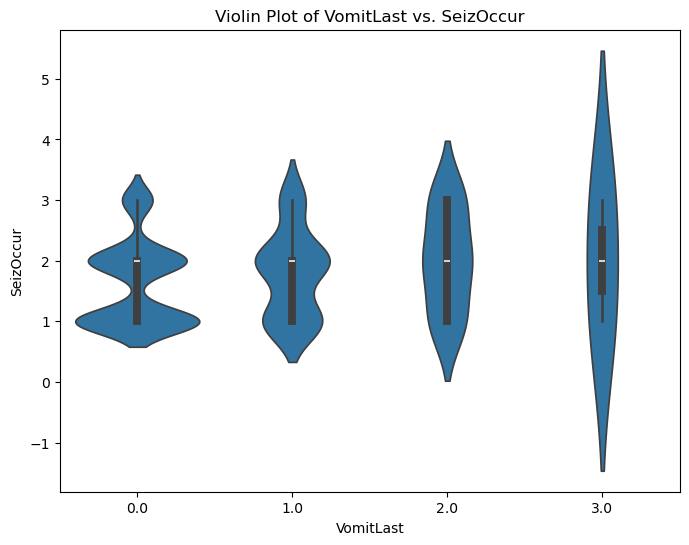

In [73]:
plt.figure(figsize=(8, 6))
sns.violinplot(x="VomitLast", y="SeizOccur", data=df_data_filtered)
plt.xlabel("VomitLast")
plt.ylabel("SeizOccur")
plt.title("Violin Plot of VomitLast vs. SeizOccur")
plt.show()


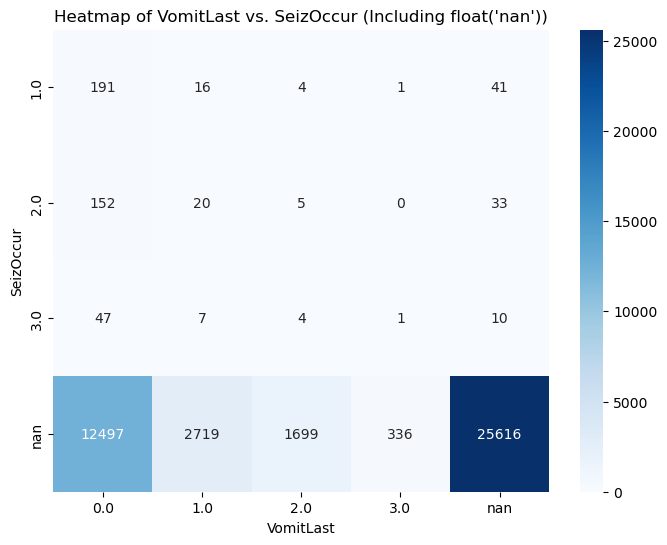

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert all values to string to keep float('nan')
df_data_str = df_data.astype(str)

# Create a pivot table for frequency count
heatmap_data = df_data_str.pivot_table(index="SeizOccur", columns="VomitLast", aggfunc="size", fill_value=0)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap="Blues", annot=True, fmt="d")
plt.xlabel("VomitLast")
plt.ylabel("SeizOccur")
plt.title("Heatmap of VomitLast vs. SeizOccur (Including float('nan'))")
plt.show()


We can see that most people have not seizure-ed and of the people recorded, most have not vomited either. Seems robust to representation, but there are a lot of unknowns in our "vomit last."

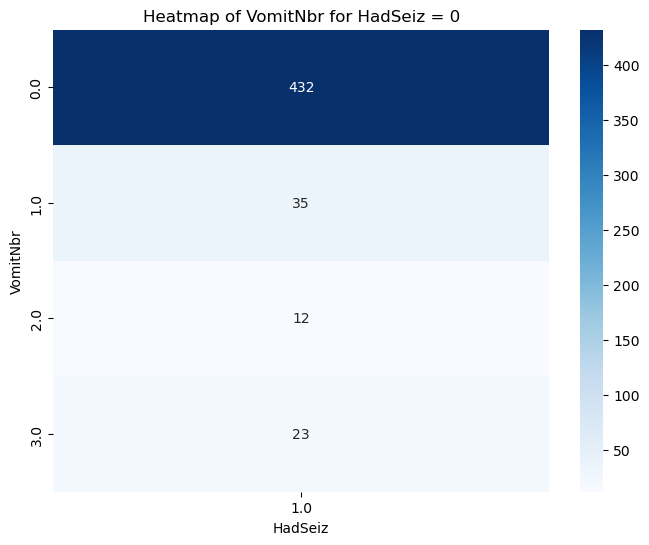

In [ ]:
# Filter data for HadSeiz = 1
df_hadseiz_0 = df_data[df_data["HadSeiz"] == 1]

# Create a pivot table for the heatmap (using VomitNbr vs SeizOccur as an example)
heatmap_0 = df_hadseiz_0.pivot_table(index="VomitNbr", columns="HadSeiz", aggfunc="size", fill_value=0)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_0, cmap="Blues", annot=True, fmt="d")
plt.xlabel("HadSeiz")
plt.ylabel("VomitNbr")
plt.title("Heatmap of VomitNbr for HadSeiz = 1")
plt.show()


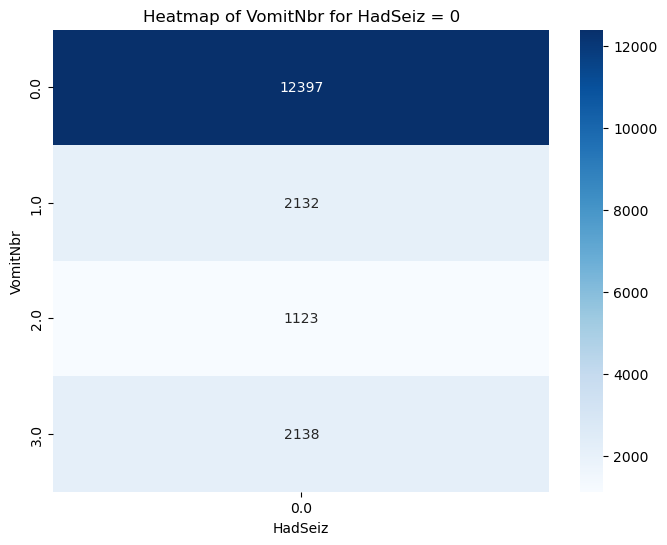

In [76]:
# Filter data for HadSeiz = 0
df_hadseiz_0 = df_data[df_data["HadSeiz"] == 0]

# Create a pivot table for the heatmap (using VomitNbr vs SeizOccur as an example)
heatmap_0 = df_hadseiz_0.pivot_table(index="VomitNbr", columns="HadSeiz", aggfunc="size", fill_value=0)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_0, cmap="Blues", annot=True, fmt="d")
plt.xlabel("HadSeiz")
plt.ylabel("VomitNbr")
plt.title("Heatmap of VomitNbr for HadSeiz = 0")
plt.show()


Based on the heatmaps, it seems that people are less likely to be vomiting if they have seizure difficulties. This may be counterintuitive at first; however, it may make sense given that a person coming in for non-seizure-related issues is more likely to be facing a different issue: such as vomiting.

# Explore more data

### Explore GCSEye

In [77]:
# Take a look at GCSEye
variable_name = "GCSEye"
column_data = get_variable_info(variable_name, df_data, df_doc)
get_frequency_table(column_data)


Data Column for 'GCSEye':


,GCSEye
0,4.0
1,4.0
2,1.0
3,4.0
4,4.0
...,...
43394,4.0
43395,4.0
43396,4.0
43397,4.0



Documentation Row for 'GCSEye':


9,Variable Name,Label/Description,Format Name and Values,Notes,NaN,NaN
23,GCSEye,GCS component: eye,GCSEye\n1 None\n2 Pain\n3 Verbal\n...,NaN,back,NaN



Returned Notes:
nan

Returned Label/Description:
GCS component: eye

Returned Format Name and Values:
GCSEye
1     None
2     Pain
3     Verbal
4    Spontaneous


,Value,Frequency
0,4.0,41148
1,NaN,1288
2,3.0,506
3,1.0,291
4,2.0,166


Here we need more domain information which we can find online.

The eye-opening response is one of three components in the Glasgow Coma Scale (GCS), scored from 1 to 4:

"None" (Score = 1) → The patient does not open their eyes, even to pain.
"Pain" (Score = 2) → The patient only opens their eyes in response to painful stimulation (e.g., pinching).
"Verbal" (Score = 3) → The patient opens their eyes when spoken to.
"Spontaneous" (Score = 4) → The patient opens their eyes naturally, without needing stimulation.

1 is worse than 4, and it is a scale. Often used for unconscious or altered-consciousness patients, especially in trauma cases, brain injuries, or ICU settings

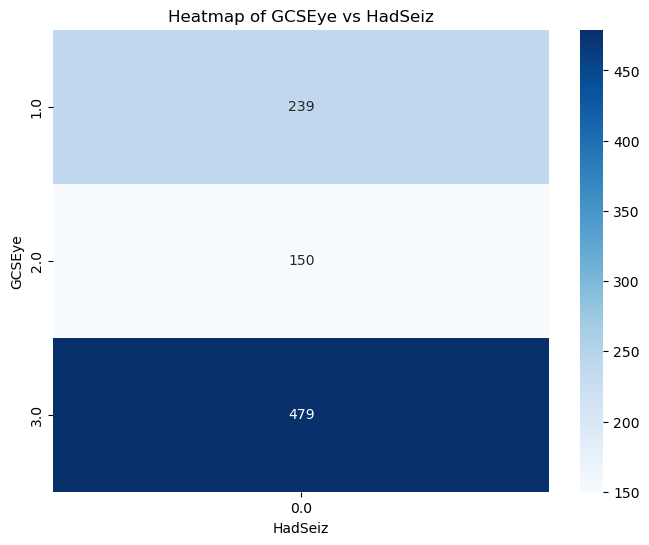

In [78]:
# Filter out unknown values to ensure proper heatmap plotting
df_gcs_eye = df_data[(df_data["HadSeiz"] == 0) & (df_data["GCSEye"] != "unknown") & (df_data["GCSEye"] != 4)]

# Keep only necessary columns
df_gcs_eye = df_gcs_eye[["GCSEye", "HadSeiz"]]

# Create a pivot table for the heatmap
heatmap_gcs_eye = df_gcs_eye.pivot_table(index="GCSEye", columns="HadSeiz", aggfunc="size", fill_value=0)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_gcs_eye, cmap="Blues", annot=True, fmt="d")
plt.xlabel("HadSeiz")
plt.ylabel("GCSEye")
plt.title("Heatmap of GCSEye vs HadSeiz")
plt.show()


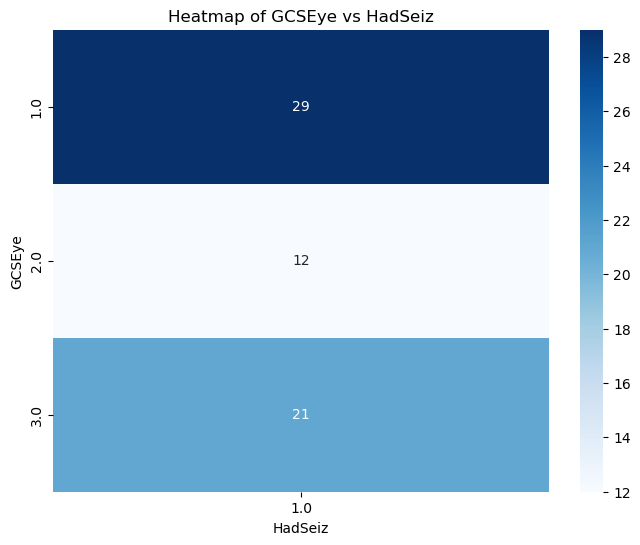

In [79]:
# Filter out unknown values to ensure proper heatmap plotting
df_gcs_eye = df_data[(df_data["HadSeiz"] == 1) & (df_data["GCSEye"] != "unknown") & (df_data["GCSEye"] != 4)]

# Keep only necessary columns
df_gcs_eye = df_gcs_eye[["GCSEye", "HadSeiz"]]

# Create a pivot table for the heatmap
heatmap_gcs_eye = df_gcs_eye.pivot_table(index="GCSEye", columns="HadSeiz", aggfunc="size", fill_value=0)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_gcs_eye, cmap="Blues", annot=True, fmt="d")
plt.xlabel("HadSeiz")
plt.ylabel("GCSEye")
plt.title("Heatmap of GCSEye vs HadSeiz")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Age Distribution Plot
plt.figure(figsize=(12, 8))

# Create age groups
df_data['AgeGroup'] = (df_data['AgeinYears'] // 2) * 2
age_dist = df_data['AgeGroup'].value_counts().sort_index()

# Create the plot
plt.bar(age_dist.index, age_dist.values, color='#8884d8', alpha=0.7)
plt.plot(age_dist.index, age_dist.values, color='#4834d4', linewidth=2)

# Customize the plot
plt.title('Age Distribution of TBI Cases', fontsize=14, pad=20)
plt.xlabel('Age Group (Years)', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)

# Add x-axis labels
plt.xticks(age_dist.index, [f'{int(i)}-{int(i)+2}' for i in age_dist.index])

# Add grid
plt.grid(True, alpha=0.3)

# Add value labels on top of bars
for i, v in enumerate(age_dist.values):
    plt.text(age_dist.index[i], v, str(int(v)), ha='center', va='bottom')

plt.tight_layout()
plt.savefig('../figs/age_distribution.png', dpi=300, bbox_inches='tight')
plt.close()

# 2. GCS Score vs CT Positive Rate
plt.figure(figsize=(12, 8))

# Calculate positive CT rates for each GCS score
gcs_analysis = df_data[df_data['CTDone'] == 1].groupby('GCSTotal').agg({
    'PosCT': ['count', 'sum']
}).reset_index()

gcs_analysis.columns = ['GCS_Score', 'Total_Cases', 'Positive_CT']
gcs_analysis['Positive_Rate'] = (gcs_analysis['Positive_CT'] / gcs_analysis['Total_Cases'] * 100)

# Plot line with markers
plt.plot(gcs_analysis['GCS_Score'], gcs_analysis['Positive_Rate'], 
         marker='o', linewidth=2, color='#2ecc71', markersize=8)

# Customize the plot
plt.title('CT Positive Rate by GCS Score', fontsize=14, pad=20)
plt.xlabel('GCS Score', fontsize=12)
plt.ylabel('Positive CT Rate (%)', fontsize=12)

# Add grid
plt.grid(True, alpha=0.3)

# Add value labels
for x, y in zip(gcs_analysis['GCS_Score'], gcs_analysis['Positive_Rate']):
    plt.text(x, y + 1, f'{y:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('../figs/gcs_ct_relationship.png', dpi=300, bbox_inches='tight')
plt.close()

# 3. GCS Eye Score Analysis
plt.figure(figsize=(12, 8))

# Calculate rates for eye scores
eye_analysis = df_data[df_data['CTDone'] == 1].groupby('GCSEye').agg({
    'PosCT': ['count', 'sum'],
    'Neurosurgery': 'sum'
}).reset_index()

eye_analysis.columns = ['Eye_Score', 'Total_Cases', 'Positive_CT', 'Neurosurgery']
eye_analysis['CT_Positive_Rate'] = (eye_analysis['Positive_CT'] / eye_analysis['Total_Cases'] * 100)
eye_analysis['Neurosurgery_Rate'] = (eye_analysis['Neurosurgery'] / eye_analysis['Total_Cases'] * 100)

# Set bar width
bar_width = 0.35

# Create bars
bars1 = plt.bar(eye_analysis['Eye_Score'] - bar_width/2, eye_analysis['CT_Positive_Rate'], 
                bar_width, label='CT Positive Rate', color='#3498db')
bars2 = plt.bar(eye_analysis['Eye_Score'] + bar_width/2, eye_analysis['Neurosurgery_Rate'], 
                bar_width, label='Neurosurgery Rate', color='#e74c3c')

# Customize the plot
plt.title('GCS Eye Score: CT Positive & Neurosurgery Rates', fontsize=14, pad=20)
plt.xlabel('GCS Eye Score', fontsize=12)
plt.ylabel('Rate (%)', fontsize=12)

# Create custom x-axis labels
plt.xticks(eye_analysis['Eye_Score'], 
           ['1 - No Opening', '2 - Pain', '3 - Voice', '4 - Spontaneous'])

# Add grid
plt.grid(True, alpha=0.3)

# Add legend
plt.legend()

# Add value labels on bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)

plt.tight_layout()
plt.savefig('../figs/eye_score_analysis.png', dpi=300, bbox_inches='tight')
plt.close()

# Print some key statistics
print("\nKey Statistics:")
print(f"Total number of cases: {len(df_data):,}")
print(f"Average age: {df_data['AgeinYears'].mean():.1f} years")
print(f"CT scan rate: {(df_data['CTDone'].mean() * 100):.1f}%")
print(f"Positive CT rate among scanned patients: {(df_data[df_data['CTDone'] == 1]['PosCT'].mean() * 100):.1f}%")

/tmp/ipykernel_47936/914815058.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['AgeGroup'] = (df_data['AgeinYears'] // 2) * 2



Key Statistics:
Total number of cases: 43,382
Average age: 6.6 years
CT scan rate: 36.6%
Positive CT rate among scanned patients: 7.3%


: 

Confirmed when removing score 4 as well.

I realized now we do have a classification variable PostIntFinal and we can use this to do supervised learning.

In [80]:
# Take a look at GCSEye
variable_name = "PosIntFinal"
column_data = get_variable_info(variable_name, df_data, df_doc)
get_frequency_table(column_data)


Data Column for 'PosIntFinal':


,PosIntFinal
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
43394,0.0
43395,0.0
43396,0.0
43397,0.0



Documentation Row for 'PosIntFinal':


9,Variable Name,Label/Description,Format Name and Values,Notes,NaN,NaN
124,PosIntFinal,Clinically-important traumatic brain injury,YesNo\n0 No\n1 Yes,Clinically-important TBI was defined as having...,MAIN RES,NaN



Returned Notes:
Clinically-important TBI was defined as having at least one of the following: (1) neurosurgical procedure performed, (2)  intubated > 24 hours for head trauma,  (3) death due to TBI or in the ED, (4) hospitalized for >= 2 nights due to head injury and having a TBI on CT.

Returned Label/Description:
Clinically-important traumatic brain injury

Returned Format Name and Values:
YesNo
0   No
1   Yes


,Value,Frequency
0,0.0,42616
1,1.0,763
2,NaN,20


Now I filter the dataset to retain only the key columns related to TBI, extracts rows where "PosIntFinal" is NaN into a separate DataFrame for cleaning

In [81]:
# Define relevant columns
columns_to_keep = ["PatNum", "PosCT", "DeathTBI", "HospHeadPosCT", "PosIntFinal"]

# Filter dataset to keep only relevant columns
df_filtered = df_data[columns_to_keep]

# Create a DataFrame with only NaN values in 'PosIntFinal'
nan_df_class = df_filtered[df_filtered["PosIntFinal"].isna()]

nan_df_class


,PatNum,PosCT,DeathTBI,HospHeadPosCT,PosIntFinal
75,76,0.0,NaN,0.0,NaN
781,782,0.0,NaN,0.0,NaN
947,948,0.0,0.0,0.0,NaN
6112,6113,0.0,0.0,0.0,NaN
9541,9542,0.0,0.0,0.0,NaN
10514,10515,0.0,0.0,0.0,NaN
10721,10722,92.0,0.0,0.0,NaN
15233,15234,92.0,0.0,0.0,NaN
23581,23582,0.0,0.0,0.0,NaN
24073,24074,0.0,0.0,0.0,NaN


Given the above, it seems that there are a few people that should be classified as TBI based on PosCT section. We will make such an adjustment. The rest we can drop because they seem unlikely to be positive for TBI. We choose to drop them because there are two cases:

1. They are meant to be net-positive for TBI and we are making a bad decision by making them all TBI negative.

2. They are meant to be net-negative for TBI and we do not lose much information by dropping already have 42000+ TBI negative individuals in our data

In [82]:
# Keep only rows where PosCT is 1
nan_df_class = nan_df_class[nan_df_class["PosCT"] == 1]

# Set PosIntFinal to 1 for these rows
nan_df_class["PosIntFinal"] = 1
nan_df_class

/tmp/ipykernel_47936/2298626134.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nan_df_class["PosIntFinal"] = 1


,PatNum,PosCT,DeathTBI,HospHeadPosCT,PosIntFinal
25524,25525,1.0,0.0,0.0,1
27333,27334,1.0,0.0,0.0,1
39986,39987,1.0,0.0,0.0,1


In [83]:
# Update df_data with the respective updated values from nan_df_class
df_data.update(nan_df_class)

# Drop rows left with NaN in df_data
df_data = df_data.dropna(subset=["PosIntFinal"])


In [84]:
# Take a look at GCSEye
variable_name = "PosIntFinal"
column_data = get_variable_info(variable_name, df_data, df_doc)
get_frequency_table(column_data)


Data Column for 'PosIntFinal':


,PosIntFinal
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
43394,0.0
43395,0.0
43396,0.0
43397,0.0



Documentation Row for 'PosIntFinal':


9,Variable Name,Label/Description,Format Name and Values,Notes,NaN,NaN
124,PosIntFinal,Clinically-important traumatic brain injury,YesNo\n0 No\n1 Yes,Clinically-important TBI was defined as having...,MAIN RES,NaN



Returned Notes:
Clinically-important TBI was defined as having at least one of the following: (1) neurosurgical procedure performed, (2)  intubated > 24 hours for head trauma,  (3) death due to TBI or in the ED, (4) hospitalized for >= 2 nights due to head injury and having a TBI on CT.

Returned Label/Description:
Clinically-important traumatic brain injury

Returned Format Name and Values:
YesNo
0   No
1   Yes


,Value,Frequency
0,0.0,42616
1,1.0,766


Now that we cleaned our data, we can use hot one encoding to ensure that our data is encoded non-ordinally.

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder

# Define candidate categorical features
candidate_features = ['HadSeiz', 'GCSEye', "VomitNbr", "VomitStart", "IndVomit", "VomitLast"]
target_variable = 'PosIntFinal'

# One-hot encode categorical variables
df_encoded = df_data.copy()
df_encoded = df_encoded.astype(str) # Need to make sure the df is all the same datatype for encoder
encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)

# Apply One-Hot Encoding
X_encoded = encoder.fit_transform(df_encoded[candidate_features])
feature_names = encoder.get_feature_names_out(candidate_features)

# Convert to DataFrame
X_encoded = pd.DataFrame(X_encoded, columns=feature_names, index=df_encoded.index)

# Add the encoded features to the dataset
df_encoded = df_encoded.drop(columns=candidate_features)  # Drop original categorical columns
df_encoded = pd.concat([df_encoded, X_encoded], axis=1)  # Add encoded features

# Define X and y
X = df_encoded[feature_names]  # Use only one-hot encoded features
y = df_encoded[target_variable]

# Initialize greedy feature selection
selected_features = []
best_score = 0

while len(selected_features) < len(feature_names):
    best_feature = None
    for feature in feature_names:
        if feature in selected_features:
            continue
        
        # Try adding this feature
        current_features = selected_features + [feature]
        X_subset = X[current_features]
        
        model = DecisionTreeClassifier(random_state=42)
        score = np.mean(cross_val_score(model, X_subset, y, cv=5, scoring='accuracy'))
        
        if score > best_score:
            best_score = score
            best_feature = feature
    
    if best_feature is None:
        break  # No improvement found
    
    selected_features.append(best_feature)
    print(f"Added feature: {best_feature}, New score: {best_score:.4f}")

# Train final decision tree with selected features
final_model = DecisionTreeClassifier(random_state=42)
final_model.fit(X[selected_features], y)

print(f"Final selected feature order: {selected_features}")

Added feature: HadSeiz_1.0, New score: 0.9823
Final selected feature order: ['HadSeiz_1.0']


This is fairly unimpressive given that we would get about the same result if we just guessed everyone did not have a TBI:

In [86]:
42616 / (42616+766)

0.9823429071965332

In [87]:
# Take a look at GCSEye
variable_name = "PosIntFinal"
column_data = get_variable_info(variable_name, df_data, df_doc)
get_frequency_table(column_data)


Data Column for 'PosIntFinal':


,PosIntFinal
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
43394,0.0
43395,0.0
43396,0.0
43397,0.0



Documentation Row for 'PosIntFinal':


9,Variable Name,Label/Description,Format Name and Values,Notes,NaN,NaN
124,PosIntFinal,Clinically-important traumatic brain injury,YesNo\n0 No\n1 Yes,Clinically-important TBI was defined as having...,MAIN RES,NaN



Returned Notes:
Clinically-important TBI was defined as having at least one of the following: (1) neurosurgical procedure performed, (2)  intubated > 24 hours for head trauma,  (3) death due to TBI or in the ED, (4) hospitalized for >= 2 nights due to head injury and having a TBI on CT.

Returned Label/Description:
Clinically-important traumatic brain injury

Returned Format Name and Values:
YesNo
0   No
1   Yes


,Value,Frequency
0,0.0,42616
1,1.0,766


Thus, we should see how many false positives, false negatives, true negatives, and true positives we actually have.

In [88]:
from sklearn.metrics import confusion_matrix

# Make predictions on the dataset
y_pred = final_model.predict(X[selected_features])

# Compute the confusion matrix
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()

# Print TP, TN, FP, FN
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")


True Positives (TP): 0
True Negatives (TN): 42616
False Positives (FP): 0
False Negatives (FN): 766


Just as we expected, we have just assumed that nobody has a TBI. Let us do some bagging to fix this.

In [89]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Define candidate categorical features
candidate_features = ['HadSeiz', 'GCSEye', "VomitNbr", "VomitStart", "IndVomit", "VomitLast"]
target_variable = 'PosIntFinal'

# One-hot encode categorical variables
df_encoded = df_data.copy()
df_encoded = df_encoded.astype(str)  # Ensure all columns are string type for encoding
encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)

# Apply One-Hot Encoding
X_encoded = encoder.fit_transform(df_encoded[candidate_features])
feature_names = encoder.get_feature_names_out(candidate_features)

# Convert to DataFrame
X_encoded = pd.DataFrame(X_encoded, columns=feature_names, index=df_encoded.index)

# Add the encoded features to the dataset
df_encoded = df_encoded.drop(columns=candidate_features)  # Drop original categorical columns
df_encoded = pd.concat([df_encoded, X_encoded], axis=1)  # Add encoded features

# Define X and y
X = df_encoded[feature_names]  # Use only one-hot encoded features
y = df_encoded[target_variable]

# Apply undersampling to balance classes
rus = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Check the new class distribution
unique, counts = np.unique(y_resampled, return_counts=True)
print("Balanced class distribution after undersampling:", dict(zip(unique, counts)))

# Initialize greedy feature selection
selected_features = []
best_score = 0

while len(selected_features) < len(feature_names):
    best_feature = None
    for feature in feature_names:
        if feature in selected_features:
            continue
        
        # Try adding this feature
        current_features = selected_features + [feature]
        X_subset = X_resampled[current_features]
        
        # Use Balanced Bagging to balance class distribution
        model = BalancedBaggingClassifier(
            estimator=DecisionTreeClassifier(random_state=42, max_depth=None),
            sampling_strategy=1.0,  # Ensure equal number of 0s and 1s
            random_state=42,
            n_estimators=50,  # Increase base estimators
            n_jobs=-1  # Use all CPU cores
        )

        score = np.mean(cross_val_score(model, X_subset, y_resampled, cv=5, scoring='accuracy'))
        
        if score > best_score:
            best_score = score
            best_feature = feature
    
    if best_feature is None:
        break  # No improvement found
    
    selected_features.append(best_feature)
    print(f"Added feature: {best_feature}, New score: {best_score:.4f}")

# Train final balanced bagging model with selected features
final_model = BalancedBaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42, max_depth=None),
    sampling_strategy=1.0,
    random_state=42,
    n_estimators=50,
    n_jobs=-1
)
final_model.fit(X_resampled[selected_features], y_resampled)

# Predict on the training data
y_pred = final_model.predict(X_resampled[selected_features])

# Count occurrences of 0s and 1s in the predicted labels
unique, counts = np.unique(y_pred, return_counts=True)
print("Final predicted class distribution:", dict(zip(unique, counts)))

print(f"Final selected feature order: {selected_features}")

Balanced class distribution after undersampling: {'0.0': np.int64(766), '1.0': np.int64(766)}
Added feature: IndVomit_nan, New score: 0.7931
Added feature: HadSeiz_nan, New score: 0.7944
Added feature: GCSEye_4.0, New score: 0.7964
Added feature: GCSEye_nan, New score: 0.7996
Final predicted class distribution: {'0.0': np.int64(461), '1.0': np.int64(1071)}
Final selected feature order: ['IndVomit_nan', 'HadSeiz_nan', 'GCSEye_4.0', 'GCSEye_nan']


In [90]:
# Make predictions
y_pred = final_model.predict(X[selected_features])

# Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()

# Compute proportions
total_positives = tp + fn  # Actual Positives
total_negatives = tn + fp  # Actual Negatives

sensitivity = tp / total_positives if total_positives > 0 else 0  # True Positive Rate (TPR)
specificity = tn / total_negatives if total_negatives > 0 else 0  # True Negative Rate (TNR)
false_positive_rate = fp / total_negatives if total_negatives > 0 else 0  # FPR
false_negative_rate = fn / total_positives if total_positives > 0 else 0  # FNR

# Print results
print(f"True Positives (TP): {tp} ({sensitivity:.4f} of actual positives)")
print(f"True Negatives (TN): {tn} ({specificity:.4f} of actual negatives)")
print(f"False Positives (FP): {fp} ({false_positive_rate:.4f} of actual negatives)")
print(f"False Negatives (FN): {fn} ({false_negative_rate:.4f} of actual positives)")

True Positives (TP): 765 (0.9987 of actual positives)
True Negatives (TN): 26434 (0.6203 of actual negatives)
False Positives (FP): 16182 (0.3797 of actual negatives)
False Negatives (FN): 1 (0.0013 of actual positives)


Not particularly impressive as we would be recommending more of the patients to get CT scans than were actually suggested to, meaning we would be making the fundamental problem worse.

Let us look at the features the research paper we read used:

AMS
LOCSeparate
LocLen
Vomit
VomitNbr
High_impact_InjSev
HA_verb
HASeverity
SFxBas
SFxPalp
ActNorm

In [91]:
# Define candidate categorical features
candidate_features = ["AMS", "LOCSeparate", "LocLen", "Vomit", "VomitNbr", "High_impact_InjSev", "HA_verb", "HASeverity", "SFxBas", "SFxPalp", "ActNorm", 'HadSeiz']
target_variable = 'PosIntFinal'

# One-hot encode categorical variables
df_encoded = df_data.copy()
df_encoded = df_encoded.astype(str)  # Ensure all columns are string type for encoding
encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)

# Apply One-Hot Encoding
X_encoded = encoder.fit_transform(df_encoded[candidate_features])
feature_names = encoder.get_feature_names_out(candidate_features)

# Convert to DataFrame
X_encoded = pd.DataFrame(X_encoded, columns=feature_names, index=df_encoded.index)

# Add the encoded features to the dataset
df_encoded = df_encoded.drop(columns=candidate_features)  # Drop original categorical columns
df_encoded = pd.concat([df_encoded, X_encoded], axis=1)  # Add encoded features

# Define X and y
X = df_encoded[feature_names]  # Use only one-hot encoded features
y = df_encoded[target_variable]

# Apply undersampling to balance classes
rus = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Check the new class distribution
unique, counts = np.unique(y_resampled, return_counts=True)
print("Balanced class distribution after undersampling:", dict(zip(unique, counts)))

# Initialize greedy feature selection
selected_features = []
best_score = 0

while len(selected_features) < len(feature_names):
    best_feature = None
    for feature in feature_names:
        if feature in selected_features:
            continue
        
        # Try adding this feature
        current_features = selected_features + [feature]
        X_subset = X_resampled[current_features]
        
        # Use Balanced Bagging to balance class distribution
        model = BalancedBaggingClassifier(
            estimator=DecisionTreeClassifier(random_state=42, max_depth=None),
            sampling_strategy=1.0,  # Ensure equal number of 0s and 1s
            random_state=42,
            n_estimators=50,  # Increase base estimators
            n_jobs=-1  # Use all CPU cores
        )

        score = np.mean(cross_val_score(model, X_subset, y_resampled, cv=5, scoring='accuracy'))
        
        if score > best_score:
            best_score = score
            best_feature = feature
    
    if best_feature is None:
        break  # No improvement found
    
    selected_features.append(best_feature)
    print(f"Added feature: {best_feature}, New score: {best_score:.4f}")

# Train final balanced bagging model with selected features
final_model = BalancedBaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42, max_depth=None),
    sampling_strategy=1.0,
    random_state=42,
    n_estimators=50,
    n_jobs=-1
)
final_model.fit(X_resampled[selected_features], y_resampled)

# Predict on the training data
y_pred = final_model.predict(X_resampled[selected_features])

# Count occurrences of 0s and 1s in the predicted labels
unique, counts = np.unique(y_pred, return_counts=True)
print("Final predicted class distribution:", dict(zip(unique, counts)))

print(f"Final selected feature order: {selected_features}")

Balanced class distribution after undersampling: {'0.0': np.int64(766), '1.0': np.int64(766)}
Added feature: AMS_1.0, New score: 0.8290
Added feature: SFxBas_1.0, New score: 0.8401
Added feature: SFxPalp_1.0, New score: 0.8473
Added feature: SFxPalp_2.0, New score: 0.8519
Added feature: LocLen_4.0, New score: 0.8538
Added feature: VomitNbr_nan, New score: 0.8545
Added feature: Vomit_1.0, New score: 0.8590
Added feature: LOCSeparate_nan, New score: 0.8616
Added feature: High_impact_InjSev_2.0, New score: 0.8623
Added feature: Vomit_nan, New score: 0.8629
Final predicted class distribution: {'0.0': np.int64(743), '1.0': np.int64(789)}
Final selected feature order: ['AMS_1.0', 'SFxBas_1.0', 'SFxPalp_1.0', 'SFxPalp_2.0', 'LocLen_4.0', 'VomitNbr_nan', 'Vomit_1.0', 'LOCSeparate_nan', 'High_impact_InjSev_2.0', 'Vomit_nan']


In [92]:
# Make predictions
y_pred = final_model.predict(X[selected_features])

# Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()

# Compute proportions
total_positives = tp + fn  # Actual Positives
total_negatives = tn + fp  # Actual Negatives

sensitivity = tp / total_positives if total_positives > 0 else 0  # True Positive Rate (TPR)
specificity = tn / total_negatives if total_negatives > 0 else 0  # True Negative Rate (TNR)
false_positive_rate = fp / total_negatives if total_negatives > 0 else 0  # FPR
false_negative_rate = fn / total_positives if total_positives > 0 else 0  # FNR

# Print results
print(f"True Positives (TP): {tp} ({sensitivity:.4f} of actual positives)")
print(f"True Negatives (TN): {tn} ({specificity:.4f} of actual negatives)")
print(f"False Positives (FP): {fp} ({false_positive_rate:.4f} of actual negatives)")
print(f"False Negatives (FN): {fn} ({false_negative_rate:.4f} of actual positives)")


True Positives (TP): 676 (0.8825 of actual positives)
True Negatives (TN): 36220 (0.8499 of actual negatives)
False Positives (FP): 6396 (0.1501 of actual negatives)
False Negatives (FN): 90 (0.1175 of actual positives)


Let us try combining both of these.

In [93]:
# Define candidate categorical features
candidate_features = ["AMS", "LOCSeparate", "LocLen", "Vomit", "VomitNbr", "High_impact_InjSev", "HA_verb", "HASeverity", "SFxBas", "SFxPalp", "ActNorm", 'HadSeiz', 'HadSeiz', 'GCSEye', "VomitNbr", "VomitStart", "IndVomit", "VomitLast"]
target_variable = 'PosIntFinal'

# One-hot encode categorical variables
df_encoded = df_data.copy()
df_encoded = df_encoded.astype(str)  # Ensure all columns are string type for encoding
encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)

# Apply One-Hot Encoding
X_encoded = encoder.fit_transform(df_encoded[candidate_features])
feature_names = encoder.get_feature_names_out(candidate_features)

# Convert to DataFrame
X_encoded = pd.DataFrame(X_encoded, columns=feature_names, index=df_encoded.index)

# Add the encoded features to the dataset
df_encoded = df_encoded.drop(columns=candidate_features)  # Drop original categorical columns
df_encoded = pd.concat([df_encoded, X_encoded], axis=1)  # Add encoded features

# Define X and y
X = df_encoded[feature_names]  # Use only one-hot encoded features
y = df_encoded[target_variable]

# Apply undersampling to balance classes
rus = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Check the new class distribution
unique, counts = np.unique(y_resampled, return_counts=True)
print("Balanced class distribution after undersampling:", dict(zip(unique, counts)))

# Initialize greedy feature selection
selected_features = []
best_score = 0

while len(selected_features) < len(feature_names):
    best_feature = None
    for feature in feature_names:
        if feature in selected_features:
            continue
        
        # Try adding this feature
        current_features = selected_features + [feature]
        X_subset = X_resampled[current_features]
        
        # Use Balanced Bagging to balance class distribution
        model = BalancedBaggingClassifier(
            estimator=DecisionTreeClassifier(random_state=42, max_depth=None),
            sampling_strategy=1.0,  # Ensure equal number of 0s and 1s
            random_state=42,
            n_estimators=50,  # Increase base estimators
            n_jobs=-1  # Use all CPU cores
        )

        score = np.mean(cross_val_score(model, X_subset, y_resampled, cv=5, scoring='accuracy'))
        
        if score > best_score:
            best_score = score
            best_feature = feature
    
    if best_feature is None:
        break  # No improvement found
    
    selected_features.append(best_feature)
    print(f"Added feature: {best_feature}, New score: {best_score:.4f}")

# Train final balanced bagging model with selected features
final_model = BalancedBaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42, max_depth=None),
    sampling_strategy=1.0,
    random_state=42,
    n_estimators=50,
    n_jobs=-1
)
final_model.fit(X_resampled[selected_features], y_resampled)

# Predict on the training data
y_pred = final_model.predict(X_resampled[selected_features])

# Count occurrences of 0s and 1s in the predicted labels
unique, counts = np.unique(y_pred, return_counts=True)
print("Final predicted class distribution:", dict(zip(unique, counts)))

print(f"Final selected feature order: {selected_features}")

Balanced class distribution after undersampling: {'0.0': np.int64(766), '1.0': np.int64(766)}
Added feature: AMS_1.0, New score: 0.8290
Added feature: SFxBas_1.0, New score: 0.8401
Added feature: SFxPalp_1.0, New score: 0.8473
Added feature: SFxPalp_2.0, New score: 0.8519
Added feature: IndVomit_nan, New score: 0.8577
Added feature: ActNorm_nan, New score: 0.8623
Added feature: LocLen_4.0, New score: 0.8656
Added feature: HASeverity_nan, New score: 0.8669
Added feature: LOCSeparate_1.0, New score: 0.8688
Final predicted class distribution: {'0.0': np.int64(713), '1.0': np.int64(819)}
Final selected feature order: ['AMS_1.0', 'SFxBas_1.0', 'SFxPalp_1.0', 'SFxPalp_2.0', 'IndVomit_nan', 'ActNorm_nan', 'LocLen_4.0', 'HASeverity_nan', 'LOCSeparate_1.0']


In [94]:
# Make predictions
y_pred = final_model.predict(X[selected_features])

# Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()

# Compute proportions
total_positives = tp + fn  # Actual Positives
total_negatives = tn + fp  # Actual Negatives

sensitivity = tp / total_positives if total_positives > 0 else 0  # True Positive Rate (TPR)
specificity = tn / total_negatives if total_negatives > 0 else 0  # True Negative Rate (TNR)
false_positive_rate = fp / total_negatives if total_negatives > 0 else 0  # FPR
false_negative_rate = fn / total_positives if total_positives > 0 else 0  # FNR

# Print results
print(f"True Positives (TP): {tp} ({sensitivity:.4f} of actual positives)")
print(f"True Negatives (TN): {tn} ({specificity:.4f} of actual negatives)")
print(f"False Positives (FP): {fp} ({false_positive_rate:.4f} of actual negatives)")
print(f"False Negatives (FN): {fn} ({false_negative_rate:.4f} of actual positives)")


True Positives (TP): 694 (0.9060 of actual positives)
True Negatives (TN): 35566 (0.8346 of actual negatives)
False Positives (FP): 7050 (0.1654 of actual negatives)
False Negatives (FN): 72 (0.0940 of actual positives)


Out of each of these data trees we ran, ['HadSeiz', 'GCSEye', "VomitNbr", "VomitStart", "IndVomit", "VomitLast"] decreased the amount of false negatives we got while also still allowing us to have many true negatives. I think this is most preferable because we want to make sure that all people who have TBI are caught while still decreasing the number of patients unnecessarily put through CT scanning. 

However, the 37% false positive rate was worse than the ~35% of people suggested to get a CT scan from the dataset. We are over-telling patients to get CT scans.


Let us see if putting the people into different age ranges will help: such as what the researcher did in the document. This makes sense because often times different age groups have different manifesting symptoms.

In [95]:
# Patients younger than 2 years
df_under_2 = df_data[df_data["AgeInMonth"] < 24]

# Patients aged 2 years and older
df_2_and_older = df_data[df_data["AgeInMonth"] >= 24]

Younger than 2

In [96]:
# Define candidate categorical features
candidate_features = ['HadSeiz', 'GCSEye', "VomitNbr", "VomitStart", "IndVomit", "VomitLast"]
target_variable = 'PosIntFinal'

# One-hot encode categorical variables
df_encoded = df_under_2.copy()
df_encoded = df_encoded.astype(str)  # Ensure all columns are string type for encoding
encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)

# Apply One-Hot Encoding
X_encoded = encoder.fit_transform(df_encoded[candidate_features])
feature_names = encoder.get_feature_names_out(candidate_features)

# Convert to DataFrame
X_encoded = pd.DataFrame(X_encoded, columns=feature_names, index=df_encoded.index)

# Add the encoded features to the dataset
df_encoded = df_encoded.drop(columns=candidate_features)  # Drop original categorical columns
df_encoded = pd.concat([df_encoded, X_encoded], axis=1)  # Add encoded features

# Define X and y
X = df_encoded[feature_names]  # Use only one-hot encoded features
y = df_encoded[target_variable]

# Apply undersampling to balance classes
rus = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Check the new class distribution
unique, counts = np.unique(y_resampled, return_counts=True)
print("Balanced class distribution after undersampling:", dict(zip(unique, counts)))

# Initialize greedy feature selection
selected_features = []
best_score = 0

while len(selected_features) < len(feature_names):
    best_feature = None
    for feature in feature_names:
        if feature in selected_features:
            continue
        
        # Try adding this feature
        current_features = selected_features + [feature]
        X_subset = X_resampled[current_features]
        
        # Use Balanced Bagging to balance class distribution
        model = BalancedBaggingClassifier(
            estimator=DecisionTreeClassifier(random_state=42, max_depth=None),
            sampling_strategy=1.0,  # Ensure equal number of 0s and 1s
            random_state=42,
            n_estimators=50,  # Increase base estimators
            n_jobs=-1  # Use all CPU cores
        )

        score = np.mean(cross_val_score(model, X_subset, y_resampled, cv=5, scoring='accuracy'))
        
        if score > best_score:
            best_score = score
            best_feature = feature
    
    if best_feature is None:
        break  # No improvement found
    
    selected_features.append(best_feature)
    print(f"Added feature: {best_feature}, New score: {best_score:.4f}")

# Train final balanced bagging model with selected features
final_model = BalancedBaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42, max_depth=None),
    sampling_strategy=1.0,
    random_state=42,
    n_estimators=50,
    n_jobs=-1
)
final_model.fit(X_resampled[selected_features], y_resampled)

# Predict on the training data
y_pred = final_model.predict(X_resampled[selected_features])

# Count occurrences of 0s and 1s in the predicted labels
unique, counts = np.unique(y_pred, return_counts=True)
print("Final predicted class distribution:", dict(zip(unique, counts)))

print(f"Final selected feature order: {selected_features}")

Balanced class distribution after undersampling: {'0.0': np.int64(155), '1.0': np.int64(155)}
Added feature: IndVomit_nan, New score: 0.8290
Final predicted class distribution: {'0.0': np.int64(106), '1.0': np.int64(204)}
Final selected feature order: ['IndVomit_nan']


In [97]:
# Make predictions
y_pred = final_model.predict(X[selected_features])

# Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()

# Compute proportions
total_positives = tp + fn  # Actual Positives
total_negatives = tn + fp  # Actual Negatives

sensitivity = tp / total_positives if total_positives > 0 else 0  # True Positive Rate (TPR)
specificity = tn / total_negatives if total_negatives > 0 else 0  # True Negative Rate (TNR)
false_positive_rate = fp / total_negatives if total_negatives > 0 else 0  # FPR
false_negative_rate = fn / total_positives if total_positives > 0 else 0  # FNR

# Print results
print(f"True Positives (TP): {tp} ({sensitivity:.4f} of actual positives)")
print(f"True Negatives (TN): {tn} ({specificity:.4f} of actual negatives)")
print(f"False Positives (FP): {fp} ({false_positive_rate:.4f} of actual negatives)")
print(f"False Negatives (FN): {fn} ({false_negative_rate:.4f} of actual positives)")

True Positives (TP): 153 (0.9871 of actual positives)
True Negatives (TN): 6918 (0.6437 of actual negatives)
False Positives (FP): 3830 (0.3563 of actual negatives)
False Negatives (FN): 2 (0.0129 of actual positives)


Older than 2

In [98]:
# Define candidate categorical features
candidate_features = ['HadSeiz', 'GCSEye', "VomitNbr", "VomitStart", "IndVomit", "VomitLast"]
target_variable = 'PosIntFinal'

# One-hot encode categorical variables
df_encoded = df_2_and_older.copy()
df_encoded = df_encoded.astype(str)  # Ensure all columns are string type for encoding
encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)

# Apply One-Hot Encoding
X_encoded = encoder.fit_transform(df_encoded[candidate_features])
feature_names = encoder.get_feature_names_out(candidate_features)

# Convert to DataFrame
X_encoded = pd.DataFrame(X_encoded, columns=feature_names, index=df_encoded.index)

# Add the encoded features to the dataset
df_encoded = df_encoded.drop(columns=candidate_features)  # Drop original categorical columns
df_encoded = pd.concat([df_encoded, X_encoded], axis=1)  # Add encoded features

# Define X and y
X = df_encoded[feature_names]  # Use only one-hot encoded features
y = df_encoded[target_variable]

# Apply undersampling to balance classes
rus = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Check the new class distribution
unique, counts = np.unique(y_resampled, return_counts=True)
print("Balanced class distribution after undersampling:", dict(zip(unique, counts)))

# Initialize greedy feature selection
selected_features = []
best_score = 0

while len(selected_features) < len(feature_names):
    best_feature = None
    for feature in feature_names:
        if feature in selected_features:
            continue
        
        # Try adding this feature
        current_features = selected_features + [feature]
        X_subset = X_resampled[current_features]
        
        # Use Balanced Bagging to balance class distribution
        model = BalancedBaggingClassifier(
            estimator=DecisionTreeClassifier(random_state=42, max_depth=None),
            sampling_strategy=1.0,  # Ensure equal number of 0s and 1s
            random_state=42,
            n_estimators=50,  # Increase base estimators
            n_jobs=-1  # Use all CPU cores
        )

        score = np.mean(cross_val_score(model, X_subset, y_resampled, cv=5, scoring='accuracy'))
        
        if score > best_score:
            best_score = score
            best_feature = feature
    
    if best_feature is None:
        break  # No improvement found
    
    selected_features.append(best_feature)
    print(f"Added feature: {best_feature}, New score: {best_score:.4f}")

# Train final balanced bagging model with selected features
final_model = BalancedBaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42, max_depth=None),
    sampling_strategy=1.0,
    random_state=42,
    n_estimators=50,
    n_jobs=-1
)
final_model.fit(X_resampled[selected_features], y_resampled)

# Predict on the training data
y_pred = final_model.predict(X_resampled[selected_features])

# Count occurrences of 0s and 1s in the predicted labels
unique, counts = np.unique(y_pred, return_counts=True)
print("Final predicted class distribution:", dict(zip(unique, counts)))

print(f"Final selected feature order: {selected_features}")

Balanced class distribution after undersampling: {'0.0': np.int64(611), '1.0': np.int64(611)}
Added feature: IndVomit_nan, New score: 0.7881
Final predicted class distribution: {'0.0': np.int64(372), '1.0': np.int64(850)}
Final selected feature order: ['IndVomit_nan']


In [99]:
# Make predictions
y_pred = final_model.predict(X[selected_features])

# Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()

# Compute proportions
total_positives = tp + fn  # Actual Positives
total_negatives = tn + fp  # Actual Negatives

sensitivity = tp / total_positives if total_positives > 0 else 0  # True Positive Rate (TPR)
specificity = tn / total_negatives if total_negatives > 0 else 0  # True Negative Rate (TNR)
false_positive_rate = fp / total_negatives if total_negatives > 0 else 0  # FPR
false_negative_rate = fn / total_positives if total_positives > 0 else 0  # FNR

# Print results
print(f"True Positives (TP): {tp} ({sensitivity:.4f} of actual positives)")
print(f"True Negatives (TN): {tn} ({specificity:.4f} of actual negatives)")
print(f"False Positives (FP): {fp} ({false_positive_rate:.4f} of actual negatives)")
print(f"False Negatives (FN): {fn} ({false_negative_rate:.4f} of actual positives)")

True Positives (TP): 601 (0.9836 of actual positives)
True Negatives (TN): 19542 (0.6132 of actual negatives)
False Positives (FP): 12326 (0.3868 of actual negatives)
False Negatives (FN): 10 (0.0164 of actual positives)


This did not work well. Let us go back to keeping them in one group but let us remove the unknown indicators from our hot one encoding because they may be hard to interpret and may be meaningless, so splitting on them may not make sense.

In [100]:
# Define candidate categorical features
candidate_features = ['HadSeiz', 'GCSEye', "VomitNbr", "VomitStart", "IndVomit", "VomitLast"]
target_variable = 'PosIntFinal'

# One-hot encode categorical variables
df_encoded = df_data.copy().astype(str)  # Ensure all columns are string type
encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(df_encoded[candidate_features])

# Get feature names and convert to DataFrame
feature_names = encoder.get_feature_names_out(candidate_features)
X_encoded = pd.DataFrame(X_encoded, columns=feature_names, index=df_encoded.index)

# **Remove unwanted one-hot encoded columns**
columns_to_remove = ['IndVomit_unknown', 'HadSeiz_unknown', 'GCSEye_nan', 'VomitStart_unknown', 'VomitLast_unknown', 'VomitNbr_unknown', 'HadSeiz_contradiction']
X_encoded = X_encoded.drop(columns=[col for col in columns_to_remove if col in X_encoded.columns], errors='ignore')

# Drop original categorical columns and add the encoded ones
df_encoded = df_encoded.drop(columns=candidate_features, errors='ignore')
df_encoded = pd.concat([df_encoded, X_encoded], axis=1)

# Define X and y
X = df_encoded[X_encoded.columns]  # Use only one-hot encoded features
y = df_encoded[target_variable]

# Apply undersampling to balance classes
rus = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Check the new class distribution
unique, counts = np.unique(y_resampled, return_counts=True)
print("Balanced class distribution after undersampling:", dict(zip(unique, counts)))

# Initialize greedy feature selection
selected_features = []
best_score = 0

while len(selected_features) < len(X_encoded.columns):
    best_feature = None
    for feature in X_encoded.columns:
        if feature in selected_features:
            continue

        # Try adding this feature
        current_features = selected_features + [feature]
        X_subset = X_resampled[current_features]

        # Use Balanced Bagging to balance class distribution
        model = BalancedBaggingClassifier(
            estimator=DecisionTreeClassifier(random_state=42, max_depth=None),
            sampling_strategy=1.0,
            random_state=42,
            n_estimators=50,
            n_jobs=-1
        )

        score = np.mean(cross_val_score(model, X_subset, y_resampled, cv=5, scoring='accuracy'))

        if score > best_score:
            best_score = score
            best_feature = feature

    if best_feature is None:
        break  # No improvement found

    selected_features.append(best_feature)
    print(f"Added feature: {best_feature}, New score: {best_score:.4f}")

# Train final balanced bagging model with selected features
final_model = BalancedBaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42, max_depth=None),
    sampling_strategy=1.0,
    random_state=42,
    n_estimators=50,
    n_jobs=-1
)
final_model.fit(X_resampled[selected_features], y_resampled)

# Predict on the training data
y_pred = final_model.predict(X_resampled[selected_features])

# Count occurrences of 0s and 1s in the predicted labels
unique, counts = np.unique(y_pred, return_counts=True)
print("Final predicted class distribution:", dict(zip(unique, counts)))

print(f"Final selected feature order: {selected_features}")


Balanced class distribution after undersampling: {'0.0': np.int64(766), '1.0': np.int64(766)}
Added feature: IndVomit_nan, New score: 0.7931
Added feature: HadSeiz_nan, New score: 0.7944
Added feature: GCSEye_4.0, New score: 0.7964
Final predicted class distribution: {'0.0': np.int64(464), '1.0': np.int64(1068)}
Final selected feature order: ['IndVomit_nan', 'HadSeiz_nan', 'GCSEye_4.0']


In [101]:
# Make predictions
y_pred = final_model.predict(X[selected_features])

# Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()

# Compute proportions
total_positives = tp + fn  # Actual Positives
total_negatives = tn + fp  # Actual Negatives

sensitivity = tp / total_positives if total_positives > 0 else 0  # True Positive Rate (TPR)
specificity = tn / total_negatives if total_negatives > 0 else 0  # True Negative Rate (TNR)
false_positive_rate = fp / total_negatives if total_negatives > 0 else 0  # FPR
false_negative_rate = fn / total_positives if total_positives > 0 else 0  # FNR

# Print results
print(f"True Positives (TP): {tp} ({sensitivity:.4f} of actual positives)")
print(f"True Negatives (TN): {tn} ({specificity:.4f} of actual negatives)")
print(f"False Positives (FP): {fp} ({false_positive_rate:.4f} of actual negatives)")
print(f"False Negatives (FN): {fn} ({false_negative_rate:.4f} of actual positives)")

True Positives (TP): 761 (0.9935 of actual positives)
True Negatives (TN): 26438 (0.6204 of actual negatives)
False Positives (FP): 16178 (0.3796 of actual negatives)
False Negatives (FN): 5 (0.0065 of actual positives)


False positives are lower, but true positives are also lower. Let us add more features based on paper. We can remove any NaN or unknown values if we split on them since it is hard to interpret why they are NaN or 92.

In [102]:
# Define candidate categorical features
candidate_features = ['HadSeiz', 'GCSEye', "VomitNbr", "VomitStart", "IndVomit", "VomitLast", 'SFxBas', 'SFxPalp', 'AMS', 'LOCSeparate', 'Vomit', 'LocLen', 'High_impact_InjSev', 'HA_verb', 'HASeverity', 'ActNorm']
target_variable = 'PosIntFinal'

# One-hot encode categorical variables
df_encoded = df_data.copy().astype(str)  # Ensure all columns are string type
encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(df_encoded[candidate_features])

# Get feature names and convert to DataFrame
feature_names = encoder.get_feature_names_out(candidate_features)
X_encoded = pd.DataFrame(X_encoded, columns=feature_names, index=df_encoded.index)

# **Remove unwanted one-hot encoded columns**
columns_to_remove = ['IndVomit_unknown', 'HadSeiz_unknown', 'GCSEye_nan', 'VomitStart_unknown', 'VomitLast_unknown', 'VomitNbr_unknown', 'HadSeiz_contradiction']
X_encoded = X_encoded.drop(columns=[col for col in columns_to_remove if col in X_encoded.columns], errors='ignore')

# Drop original categorical columns and add the encoded ones
df_encoded = df_encoded.drop(columns=candidate_features, errors='ignore')
df_encoded = pd.concat([df_encoded, X_encoded], axis=1)

# Define X and y
X = df_encoded[X_encoded.columns]  # Use only one-hot encoded features
y = df_encoded[target_variable]

# Apply undersampling to balance classes
rus = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Check the new class distribution
unique, counts = np.unique(y_resampled, return_counts=True)
print("Balanced class distribution after undersampling:", dict(zip(unique, counts)))

# Initialize greedy feature selection
selected_features = []
best_score = 0

while len(selected_features) < len(X_encoded.columns):
    best_feature = None
    for feature in X_encoded.columns:
        if feature in selected_features:
            continue

        # Try adding this feature
        current_features = selected_features + [feature]
        X_subset = X_resampled[current_features]

        # Use Balanced Bagging to balance class distribution
        model = BalancedBaggingClassifier(
            estimator=DecisionTreeClassifier(random_state=42, max_depth=None),
            sampling_strategy=1.0,
            random_state=42,
            n_estimators=50,
            n_jobs=-1
        )

        score = np.mean(cross_val_score(model, X_subset, y_resampled, cv=5, scoring='accuracy'))

        if score > best_score:
            best_score = score
            best_feature = feature

    if best_feature is None:
        break  # No improvement found

    selected_features.append(best_feature)
    print(f"Added feature: {best_feature}, New score: {best_score:.4f}")

# Train final balanced bagging model with selected features
final_model = BalancedBaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42, max_depth=None),
    sampling_strategy=1.0,
    random_state=42,
    n_estimators=50,
    n_jobs=-1
)
final_model.fit(X_resampled[selected_features], y_resampled)

# Predict on the training data
y_pred = final_model.predict(X_resampled[selected_features])

# Count occurrences of 0s and 1s in the predicted labels
unique, counts = np.unique(y_pred, return_counts=True)
print("Final predicted class distribution:", dict(zip(unique, counts)))

print(f"Final selected feature order: {selected_features}")


Balanced class distribution after undersampling: {'0.0': np.int64(766), '1.0': np.int64(766)}
Added feature: AMS_1.0, New score: 0.8290
Added feature: SFxBas_1.0, New score: 0.8401
Added feature: SFxPalp_1.0, New score: 0.8473
Added feature: SFxPalp_2.0, New score: 0.8519
Added feature: IndVomit_nan, New score: 0.8577
Added feature: ActNorm_nan, New score: 0.8623
Added feature: LocLen_4.0, New score: 0.8656
Added feature: HASeverity_nan, New score: 0.8669
Added feature: LOCSeparate_1.0, New score: 0.8688
Final predicted class distribution: {'0.0': np.int64(713), '1.0': np.int64(819)}
Final selected feature order: ['AMS_1.0', 'SFxBas_1.0', 'SFxPalp_1.0', 'SFxPalp_2.0', 'IndVomit_nan', 'ActNorm_nan', 'LocLen_4.0', 'HASeverity_nan', 'LOCSeparate_1.0']


In [103]:
# Make predictions
y_pred = final_model.predict(X[selected_features])

# Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()

# Compute proportions
total_positives = tp + fn  # Actual Positives
total_negatives = tn + fp  # Actual Negatives

sensitivity = tp / total_positives if total_positives > 0 else 0  # True Positive Rate (TPR)
specificity = tn / total_negatives if total_negatives > 0 else 0  # True Negative Rate (TNR)
false_positive_rate = fp / total_negatives if total_negatives > 0 else 0  # FPR
false_negative_rate = fn / total_positives if total_positives > 0 else 0  # FNR

# Print results
print(f"True Positives (TP): {tp} ({sensitivity:.4f} of actual positives)")
print(f"True Negatives (TN): {tn} ({specificity:.4f} of actual negatives)")
print(f"False Positives (FP): {fp} ({false_positive_rate:.4f} of actual negatives)")
print(f"False Negatives (FN): {fn} ({false_negative_rate:.4f} of actual positives)")

True Positives (TP): 694 (0.9060 of actual positives)
True Negatives (TN): 35566 (0.8346 of actual negatives)
False Positives (FP): 7050 (0.1654 of actual negatives)
False Negatives (FN): 72 (0.0940 of actual positives)


In [104]:
# Define candidate categorical features
candidate_features = ['HadSeiz', 'GCSEye', "VomitNbr", "VomitStart", "IndVomit", "VomitLast", 'SFxBas', 'SFxPalp', 'AMS', 'LOCSeparate', 'Vomit', 'LocLen', 'High_impact_InjSev', 'HA_verb', 'HASeverity', 'ActNorm']
target_variable = 'PosIntFinal'

# One-hot encode categorical variables
df_encoded = df_data.copy().astype(str)  # Ensure all columns are string type
encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(df_encoded[candidate_features])

# Get feature names and convert to DataFrame
feature_names = encoder.get_feature_names_out(candidate_features)
X_encoded = pd.DataFrame(X_encoded, columns=feature_names, index=df_encoded.index)

# **Remove unwanted one-hot encoded columns**
columns_to_remove = []
#columns_to_remove = ['IndVomit_unknown', 'HadSeiz_unknown', 'GCSEye_nan', 'VomitStart_unknown', 'VomitLast_unknown', 'VomitNbr_unknown', 'HadSeiz_contradiction']
X_encoded = X_encoded.drop(columns=[col for col in columns_to_remove if col in X_encoded.columns], errors='ignore')

# Drop original categorical columns and add the encoded ones
df_encoded = df_encoded.drop(columns=candidate_features, errors='ignore')
df_encoded = pd.concat([df_encoded, X_encoded], axis=1)

# Define X and y
X = df_encoded[X_encoded.columns]  # Use only one-hot encoded features
y = df_encoded[target_variable]

# Apply undersampling to balance classes
rus = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Check the new class distribution
unique, counts = np.unique(y_resampled, return_counts=True)
print("Balanced class distribution after undersampling:", dict(zip(unique, counts)))

# Initialize greedy feature selection
selected_features = []
best_score = 0

# Function to force specific splits
def force_splits(features_to_include):
    global selected_features
    selected_features = [f for f in features_to_include if f in X_encoded.columns]
    print(f"Forcing split using features: {selected_features}")

# Force decision tree to split first on GCSEye_4.0 and then HadSeiz_1
force_splits(['IndVomit_1', 'HadSeiz_1'])

while len(selected_features) < len(X_encoded.columns):
    best_feature = None
    for feature in X_encoded.columns:
        if feature in selected_features:
            continue

        # Try adding this feature
        current_features = selected_features + [feature]
        X_subset = X_resampled[current_features]

        # Use Balanced Bagging to balance class distribution
        model = BalancedBaggingClassifier(
            estimator=DecisionTreeClassifier(random_state=42, max_depth=None),
            sampling_strategy=1.0,
            random_state=42,
            n_estimators=50,
            n_jobs=-1
        )

        score = np.mean(cross_val_score(model, X_subset, y_resampled, cv=5, scoring='accuracy'))

        if score > best_score:
            best_score = score
            best_feature = feature

    if best_feature is None:
        break  # No improvement found

    selected_features.append(best_feature)
    print(f"Added feature: {best_feature}, New score: {best_score:.4f}")

# Train final balanced bagging model with selected features
final_model = BalancedBaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42, max_depth=None),
    sampling_strategy=1.0,
    random_state=42,
    n_estimators=50,
    n_jobs=-1
)
final_model.fit(X_resampled[selected_features], y_resampled)

# Predict on the training data
y_pred = final_model.predict(X_resampled[selected_features])

# Count occurrences of 0s and 1s in the predicted labels
unique, counts = np.unique(y_pred, return_counts=True)
print("Final predicted class distribution:", dict(zip(unique, counts)))

print(f"Final selected feature order: {selected_features}")


Balanced class distribution after undersampling: {'0.0': np.int64(766), '1.0': np.int64(766)}
Forcing split using features: []
Added feature: AMS_1.0, New score: 0.8290
Added feature: SFxBas_1.0, New score: 0.8401
Added feature: SFxPalp_1.0, New score: 0.8473
Added feature: SFxPalp_2.0, New score: 0.8519
Added feature: IndVomit_nan, New score: 0.8577
Added feature: ActNorm_nan, New score: 0.8623
Added feature: LocLen_4.0, New score: 0.8656
Added feature: HASeverity_nan, New score: 0.8669
Added feature: LOCSeparate_1.0, New score: 0.8688
Final predicted class distribution: {'0.0': np.int64(713), '1.0': np.int64(819)}
Final selected feature order: ['AMS_1.0', 'SFxBas_1.0', 'SFxPalp_1.0', 'SFxPalp_2.0', 'IndVomit_nan', 'ActNorm_nan', 'LocLen_4.0', 'HASeverity_nan', 'LOCSeparate_1.0']


In [105]:
# Make predictions
y_pred = final_model.predict(X[selected_features])

# Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()

# Compute proportions
total_positives = tp + fn  # Actual Positives
total_negatives = tn + fp  # Actual Negatives

sensitivity = tp / total_positives if total_positives > 0 else 0  # True Positive Rate (TPR)
specificity = tn / total_negatives if total_negatives > 0 else 0  # True Negative Rate (TNR)
false_positive_rate = fp / total_negatives if total_negatives > 0 else 0  # FPR
false_negative_rate = fn / total_positives if total_positives > 0 else 0  # FNR

# Print results
print(f"True Positives (TP): {tp} ({sensitivity:.4f} of actual positives)")
print(f"True Negatives (TN): {tn} ({specificity:.4f} of actual negatives)")
print(f"False Positives (FP): {fp} ({false_positive_rate:.4f} of actual negatives)")
print(f"False Negatives (FN): {fn} ({false_negative_rate:.4f} of actual positives)")

True Positives (TP): 694 (0.9060 of actual positives)
True Negatives (TN): 35566 (0.8346 of actual negatives)
False Positives (FP): 7050 (0.1654 of actual negatives)
False Negatives (FN): 72 (0.0940 of actual positives)
